In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler,  PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Class Imbalance
from imblearn.over_sampling import SMOTE

## Model Selection and Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

In [506]:
data=pd.read_csv('roadsafety_cleaned.csv')

In [507]:
data.head()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_detail,junction_control,...,light_conditions,weather_conditions,location_cluster,region_cluster,ons_district_grouped,is_rush_hour,is_night,month,weekday,is_weekend
0,-0.202878,51.418974,1,3,1,5,5,2,9,4,...,4,8,1,0.0,E09000024,False,True,1.0,6.0,1
1,-0.042464,51.671155,1,3,1,6,6,6,3,4,...,4,1,1,0.0,E09000010,False,True,1.0,6.0,1
2,-0.435789,51.487777,1,3,1,3,6,1,1,4,...,4,1,1,0.0,E09000017,False,True,1.0,6.0,1
3,-0.263972,51.597575,1,3,1,3,6,6,3,4,...,4,9,1,0.0,E09000003,False,True,1.0,6.0,1
4,-0.168976,51.477324,1,3,1,3,6,6,8,4,...,4,1,1,0.0,E09000032,False,True,1.0,6.0,1


In [508]:
data.shape

(104174, 26)

### **EDA**

In [509]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,104174.0,-1.203882,1.349129,-7.429339,-2.091087,-1.081291,-0.134157,1.756018
latitude,104174.0,52.366015,1.320964,49.914528,51.460166,51.816626,53.341238,60.252418
urban_or_rural_area,104174.0,1.325523,0.469145,-1.000000,1.000000,1.000000,2.000000,3.000000
accident_severity,104174.0,2.746050,0.467614,1.000000,3.000000,3.000000,3.000000,3.000000
day_of_week,104174.0,4.128890,1.929041,1.000000,3.000000,4.000000,6.000000,7.000000
first_road_class,104174.0,4.225527,1.464019,1.000000,3.000000,4.000000,6.000000,6.000000
second_road_class,104174.0,3.107464,2.762572,0.000000,0.000000,3.000000,6.000000,6.000000
road_type,104174.0,5.293999,1.701227,1.000000,6.000000,6.000000,6.000000,9.000000
junction_detail,104174.0,4.628679,14.726011,0.000000,0.000000,2.000000,3.000000,99.000000
junction_control,104174.0,3.858170,1.009898,1.000000,4.000000,4.000000,4.000000,9.000000


### **Confirming missingness**

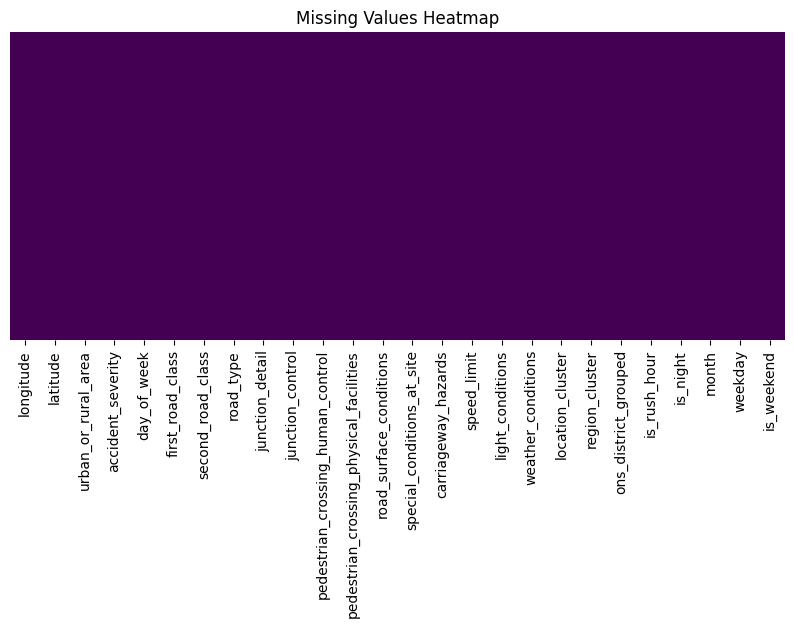

In [510]:
# Visualize missingness
plt.figure(figsize=(10, 4))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### **Univariate analysis**

In [511]:
#unique counts
print(data["accident_severity"].value_counts(),"")

accident_severity
3    79240
2    23413
1     1521
Name: count, dtype: int64 


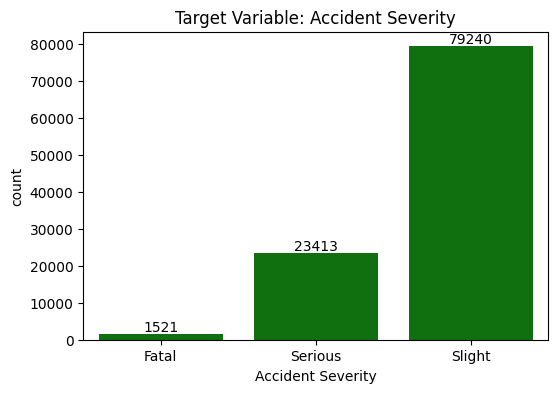

In [512]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='accident_severity', data=data, color="green")
plt.title("Target Variable: Accident Severity")
plt.xlabel("Accident Severity")
plt.xticks(ticks=[0, 1, 2], labels=['Fatal','Serious','Slight'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [513]:
class_imb = data.groupby('accident_severity').size()
print(f'Class distribution of {class_imb}')

Class distribution of accident_severity
1     1521
2    23413
3    79240
dtype: int64


In [514]:
data.head()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_detail,junction_control,...,light_conditions,weather_conditions,location_cluster,region_cluster,ons_district_grouped,is_rush_hour,is_night,month,weekday,is_weekend
0,-0.202878,51.418974,1,3,1,5,5,2,9,4,...,4,8,1,0.0,E09000024,False,True,1.0,6.0,1
1,-0.042464,51.671155,1,3,1,6,6,6,3,4,...,4,1,1,0.0,E09000010,False,True,1.0,6.0,1
2,-0.435789,51.487777,1,3,1,3,6,1,1,4,...,4,1,1,0.0,E09000017,False,True,1.0,6.0,1
3,-0.263972,51.597575,1,3,1,3,6,6,3,4,...,4,9,1,0.0,E09000003,False,True,1.0,6.0,1
4,-0.168976,51.477324,1,3,1,3,6,6,8,4,...,4,1,1,0.0,E09000032,False,True,1.0,6.0,1


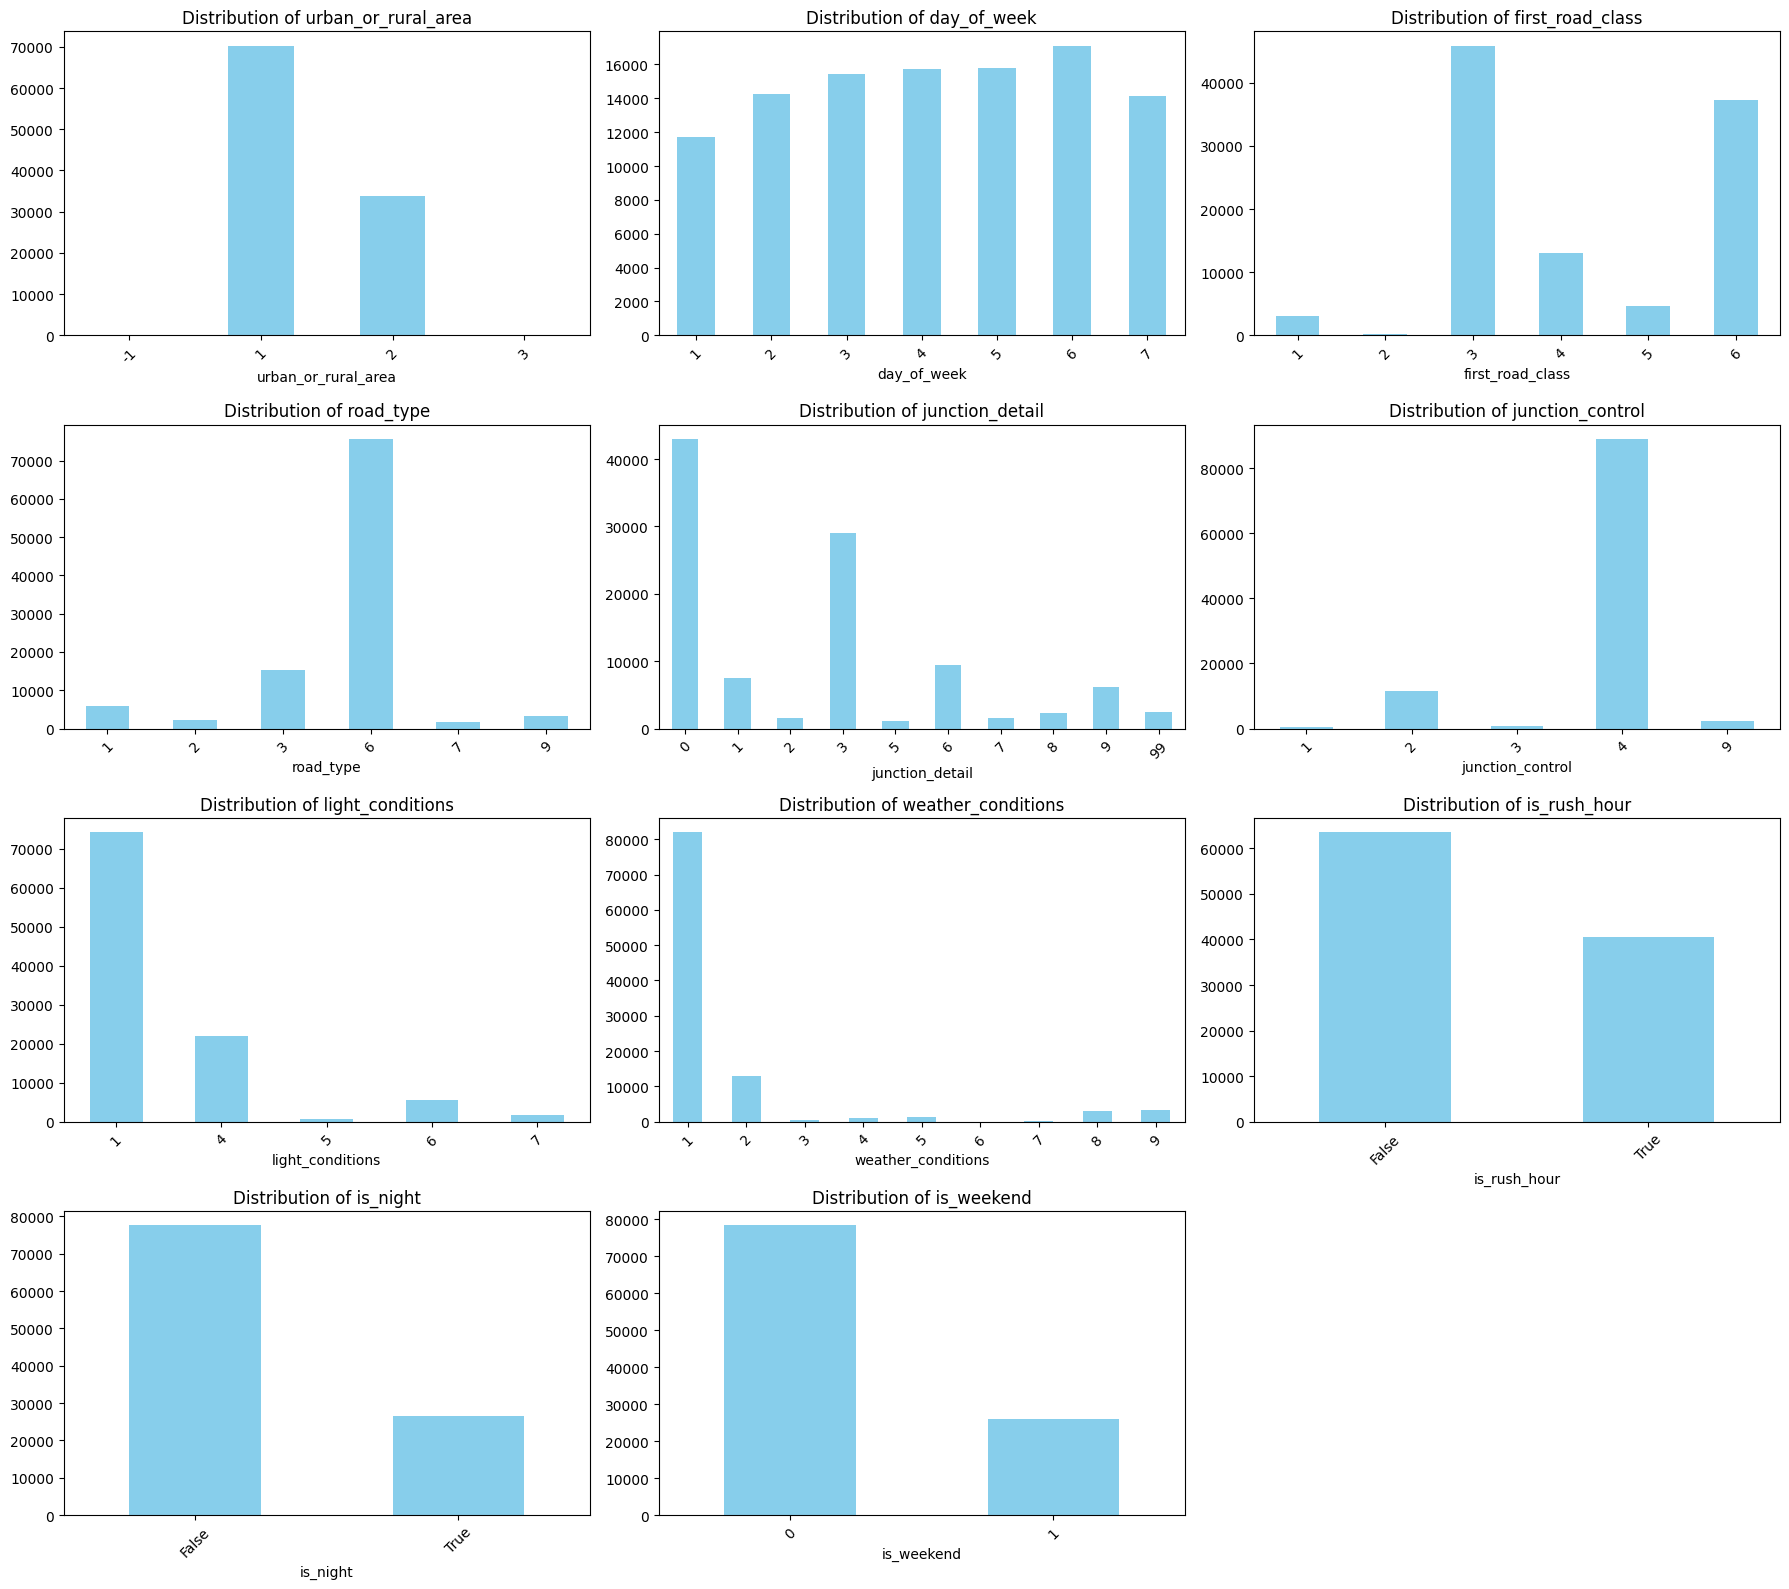

In [515]:
#Categorical variables 
categorical_cols = ['urban_or_rural_area', 'day_of_week', 'first_road_class', 'road_type',
                    'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions',
                    'is_rush_hour', 'is_night', 'is_weekend']

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel() # Flatten the 2D array of axes

for i, col in enumerate(categorical_cols):
    data[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

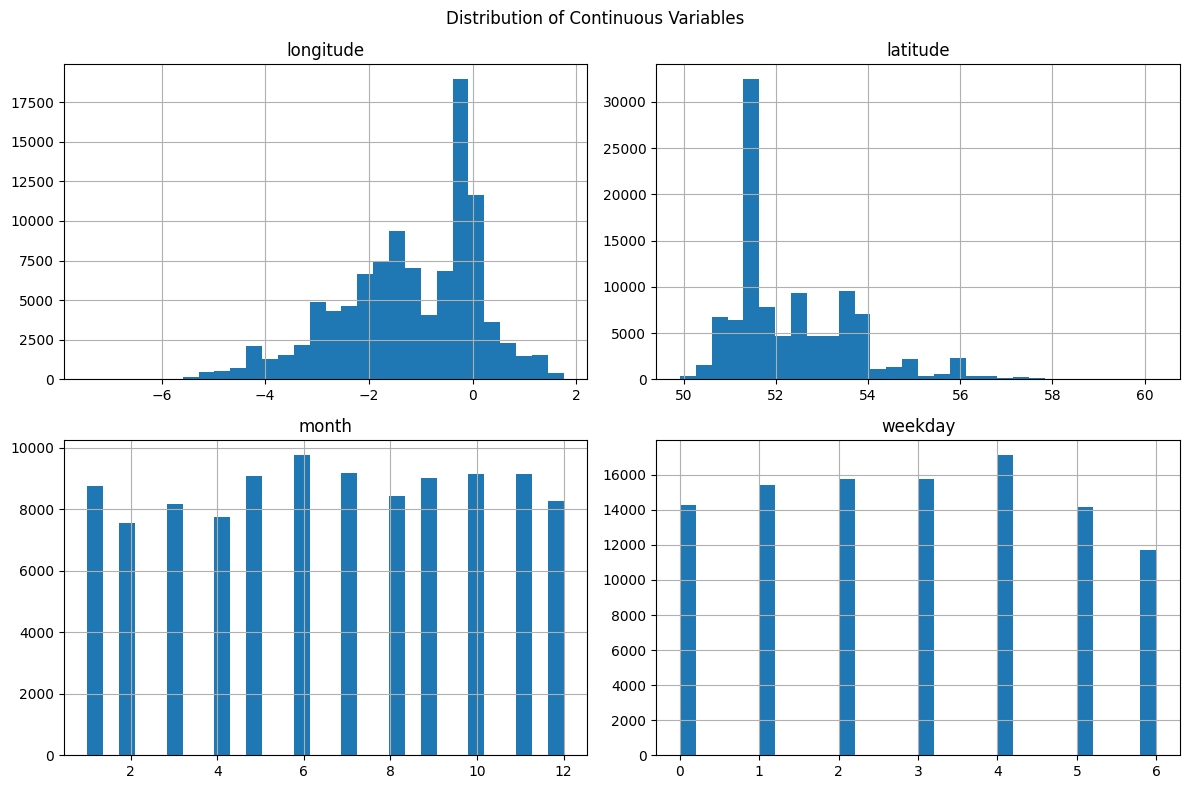

In [516]:
#continuous variables
continuous_cols = ['longitude', 'latitude', 'month', 'weekday'] # 'month' and 'weekday' are technically cyclic, but we can plot their distribution
data[continuous_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Continuous Variables')
plt.tight_layout()
plt.show()

### **Bivariate Analysis**

In [517]:
from matplotlib import colormaps
print(list(colormaps))

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

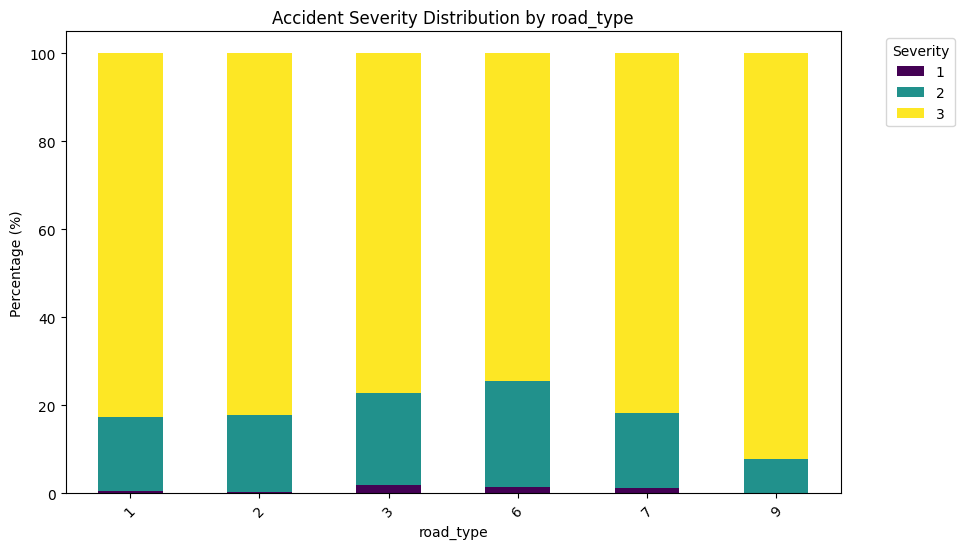

In [518]:
# Categorical Features vs. Target

# Function to plot normalized stacked bar charts
def plot_stacked_bars(df, feature, target='accident_severity'):
    cross_tab = pd.crosstab(df[feature], df[target], normalize='index') * 100
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Accident Severity Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Percentage (%)')
    plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

#based on road type?
plot_stacked_bars(data, 'road_type')


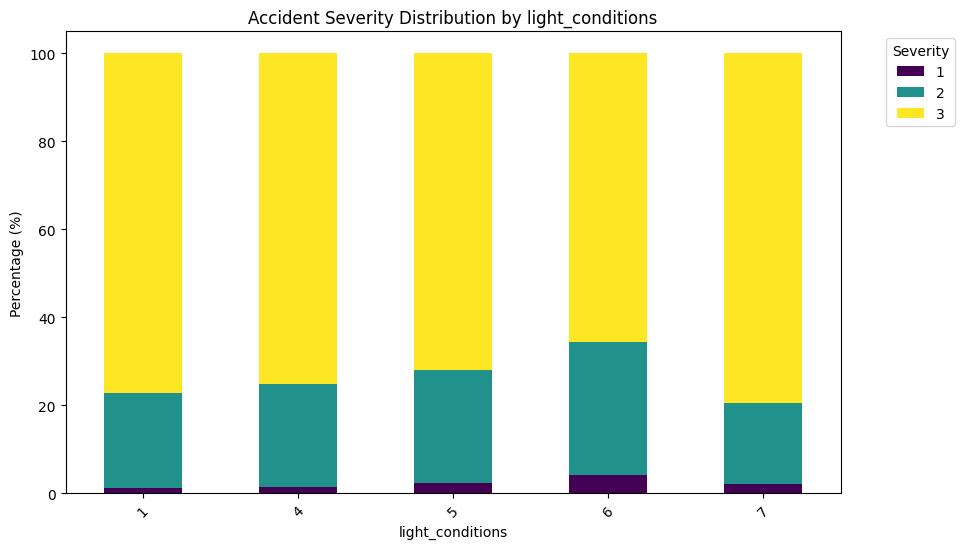

In [519]:
plot_stacked_bars(data, 'light_conditions')

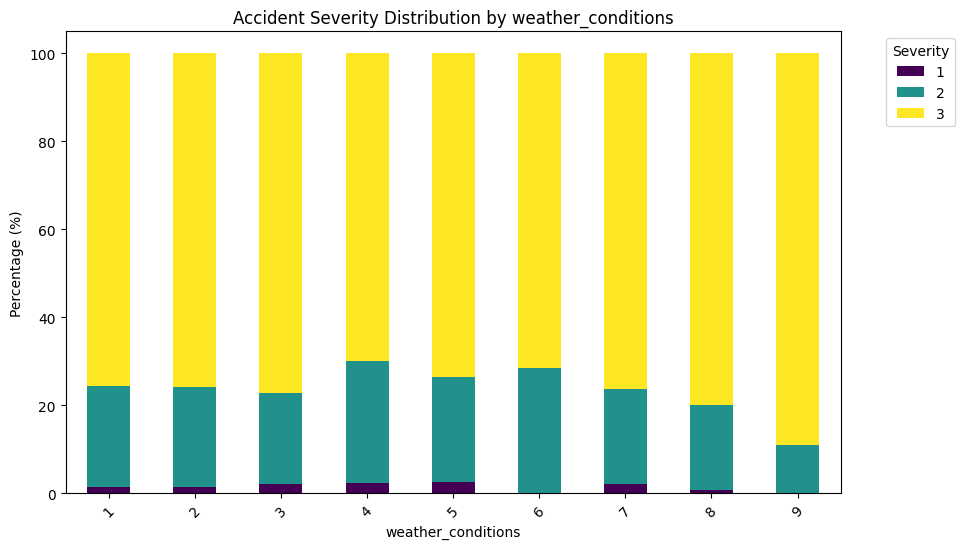

In [520]:
plot_stacked_bars(data, 'weather_conditions')

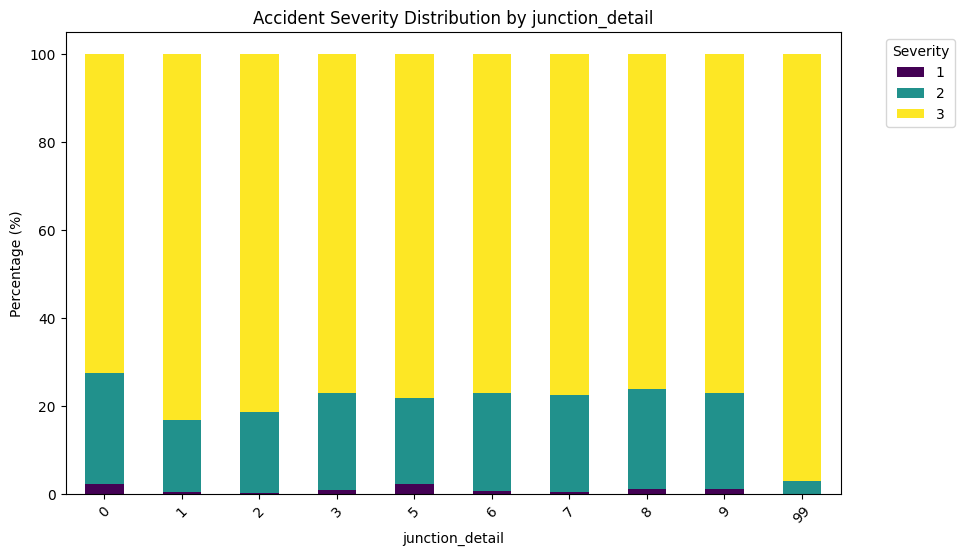

In [521]:
plot_stacked_bars(data, 'junction_detail')

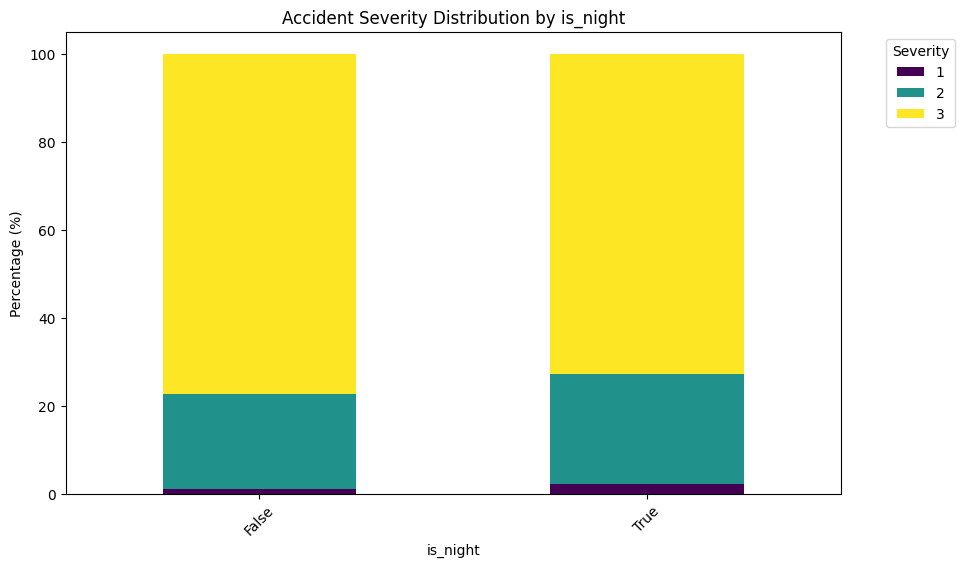

In [522]:
plot_stacked_bars(data, 'is_night')

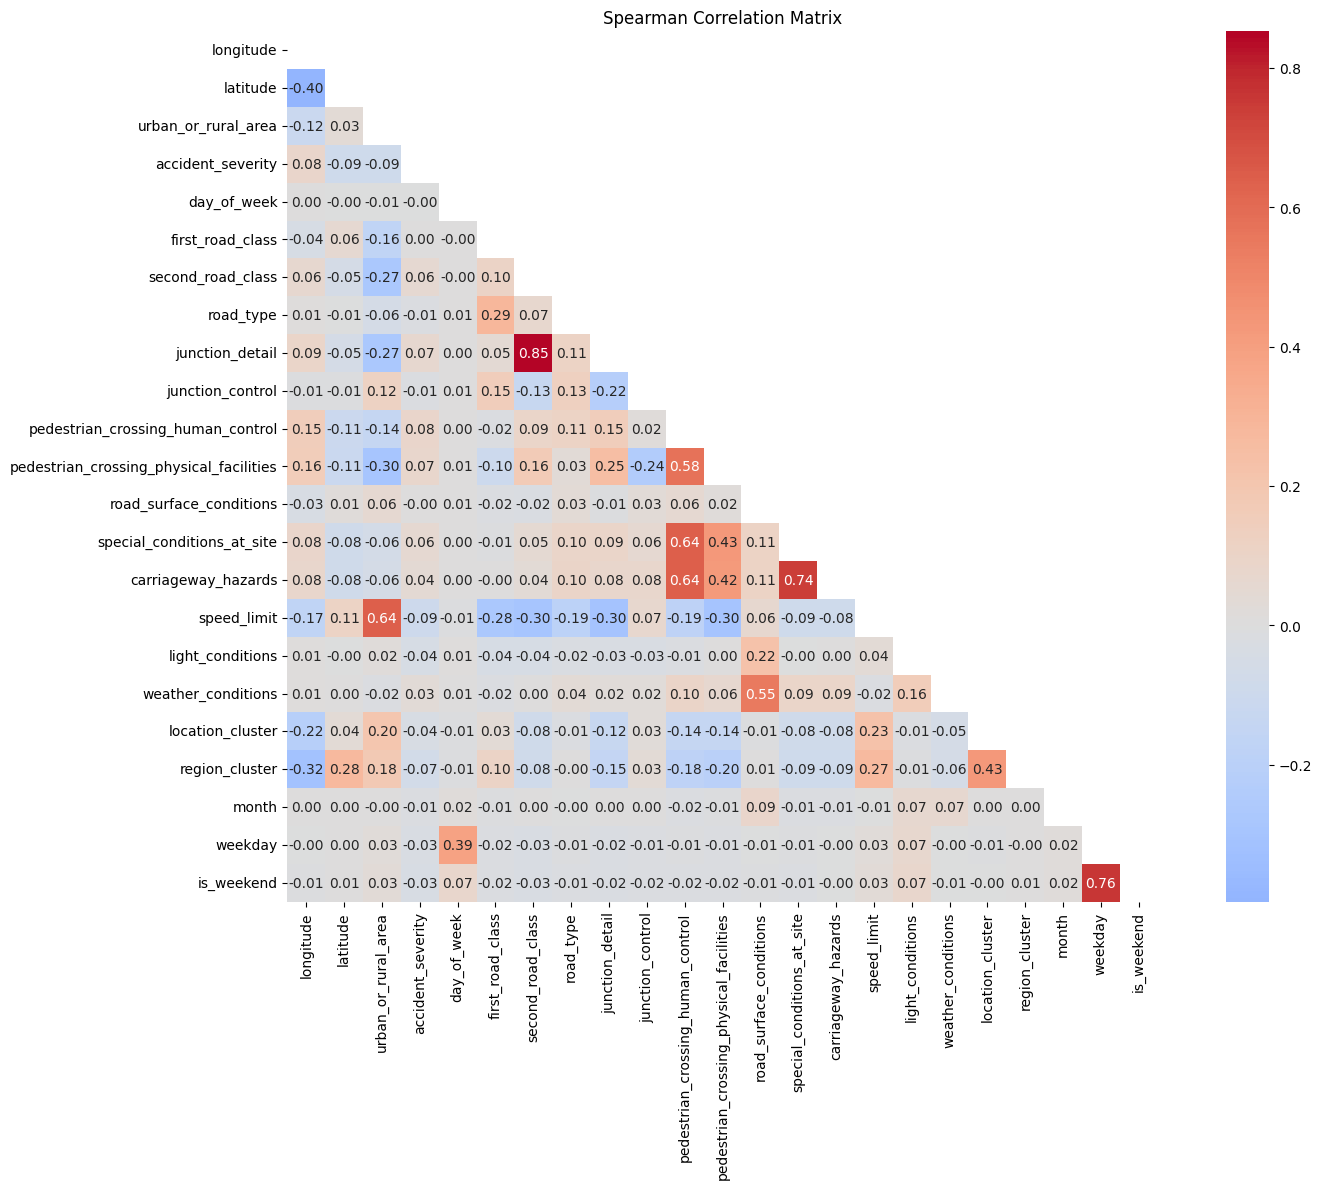

In [523]:
#Correlation analysis# Select numerical columns for correlation matrix
#Since many features are ordinal (e.g., severity, road class), we can use Spearman correlation.

corr_matrix = data.select_dtypes(include=[np.number]).corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask the upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

### **Observations**

Focusing on: The accident_severity row/column. What is most positively/negatively correlated?

**Target Variable Complexity:**

No individual feature exhibits a strong correlation with accident_severity (all coefficients < |0.10|).

The strongest observed relationships are very weak. This indicates that accident severity is a complex outcome not driven by any single factor, necessitating a model capable of capturing complex, non-linear interactions between features.

**Notable (Weak) Correlations with Severity:**

- urban_or_rural_area (-0.09): Suggests a slight tendency for accidents in rural areas to be more severe, likely due to higher speeds.

- pedestrian_crossing_human_control (0.08) & junction_detail (0.07): Slight positive correlation, possibly indicating that accidents in more complex or controlled environments (e.g., intersections with pedestrians) can lead to more severe outcomes.

**Critical Multicollinearity Identified:**
Several pairs of features show a very strong positive correlation (> 0.8), meaning they provide redundant information to the model. Retaining all of them can destabilize model coefficients and impair interpretability.

- weather_conditions & road_surface_conditions (0.95): These variables are practically synonymous. Bad weather directly causes poor road surface conditions (e.g., rain → wet road).

- special_conditions_at_site & carriageway_hazards (0.74): While strong, this relationship is below the 0.8 threshold but should still be investigated as the concepts are highly related (e.g., an object on the road is both a special condition and a hazard).

Other Expected Relationships:

- speed_limit & urban_or_rural_area (0.64): Higher speed limits are strongly associated with rural areas, validating the data's internal consistency.

- latitude & longitude (-0.40): The moderate negative correlation is a known characteristic of the geographical coordinate system for the region of study.

**Recommendations for Modeling:**

- Remove Highly Correlated Features: To mitigate multicollinearity, drop road_surface_conditions in favor of weather_conditions.

- Investigate Feature Redundancy: Evaluate the context of special_conditions_at_site and carriageway_hazards from the data dictionary. Consider creating a composite feature or removing one.

- Will consider Robust Algorithms: Proceed with tree-based models (e.g., Random Forest, Gradient Boosting) which are better suited at handling complex interactions and are less sensitive to multicollinearity than linear models.

In [524]:
# 1. Define the threshold
threshold = 0.75

# 2. Create a boolean mask for the upper triangle to avoid duplicates and self-correlations
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 3. Apply the mask and filter for correlations above the threshold
high_corr = (corr_matrix
             .where(mask) # Apply the upper triangle mask
             .stack() # Convert to long format
             .to_frame() # Convert Series to DataFrame
             .reset_index() # Move the index (feature names) to columns
             .rename(columns={0: 'correlation'}))

# 4. Filter out the self-correlations (where correlation == 1.0) and correlations below the threshold
high_corr = high_corr[(high_corr['correlation'].abs() >= threshold) & (high_corr['correlation'].abs() < 1.0)]

# 5. Sort by the absolute value of correlation for clarity
high_corr['abs_corr'] = high_corr['correlation'].abs()
high_corr = high_corr.sort_values('abs_corr', ascending=False)

# Display the results
print(f"Features with Spearman correlation |rho| >= {threshold}:")
print(high_corr.round(3))



Features with Spearman correlation |rho| >= 0.75:
               level_0          level_1  correlation  abs_corr
125  second_road_class  junction_detail        0.852     0.852
274            weekday       is_weekend        0.756     0.756


In [525]:
# Define your threshold
threshold = 0.75

# Function to identify and recommend columns to drop
def find_redundant_columns(corr_matrix, threshold):
    """
    Identifies pairs of highly correlated features and recommends which one to drop.
    The recommendation is based on which feature has a higher average correlation with all other features (more redundant).
    """
    # Create a set to hold columns to be dropped
    cols_to_drop = set()
    
    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                
                # Check which one has a higher average correlation with all other features
                avg_corr_i = corr_matrix[col_i].abs().mean()
                avg_corr_j = corr_matrix[col_j].abs().mean()
                
                # Recommend to drop the one with higher average correlation (more redundant)
                col_to_drop = col_i if avg_corr_i > avg_corr_j else col_j
                cols_to_drop.add(col_to_drop)
                print(f"High correlation: {col_i} & {col_j} (r = {corr_matrix.iloc[i, j]:.3f})")
                print(f"  -> Recommend dropping '{col_to_drop}' (higher average correlation)\n")
                
    return list(cols_to_drop)

# Get the numerical correlation matrix again for the current dataset
corr_matrix_numerical = data.select_dtypes(include=[np.number]).corr(method='spearman')

# Get the list of recommended columns to drop
redundant_cols = find_redundant_columns(corr_matrix_numerical, threshold)

# Create your modeling dataset by dropping the recommended columns
data_model = data.drop(columns=redundant_cols)
print(f"Dropped columns: {redundant_cols}")
print(f"New dataset shape: {data_model.shape}")

High correlation: junction_detail & second_road_class (r = 0.852)
  -> Recommend dropping 'junction_detail' (higher average correlation)

High correlation: is_weekend & weekday (r = 0.756)
  -> Recommend dropping 'weekday' (higher average correlation)

Dropped columns: ['junction_detail', 'weekday']
New dataset shape: (104174, 24)


<!-- ### **Geospatial analysis** -->

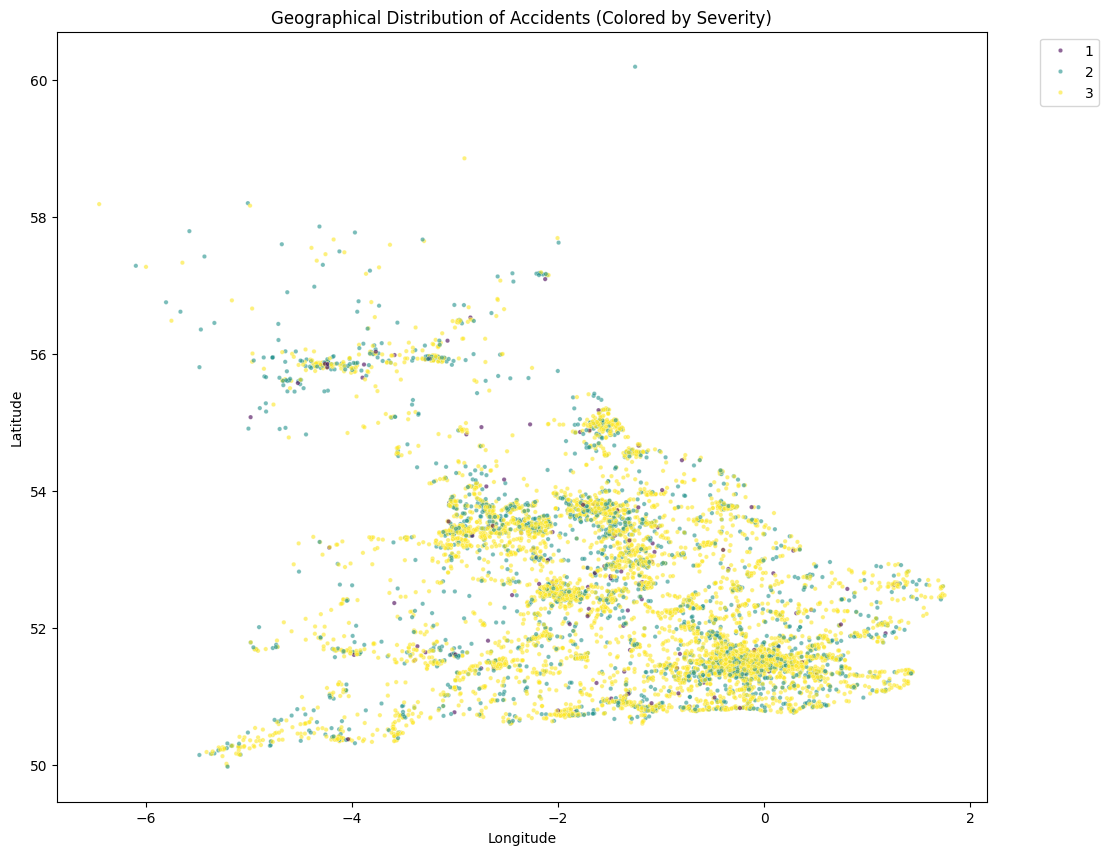

In [526]:
#Scatter plot
plt.figure(figsize=(12, 10))
# Sample the data if it's too large to plot
plot_df = data.sample(10000) if len(data) > 10000 else data
sns.scatterplot(x=plot_df['longitude'], y=plot_df['latitude'], hue=plot_df['accident_severity'],
                palette='viridis', alpha=0.6, s=10)
plt.title('Geographical Distribution of Accidents (Colored by Severity)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

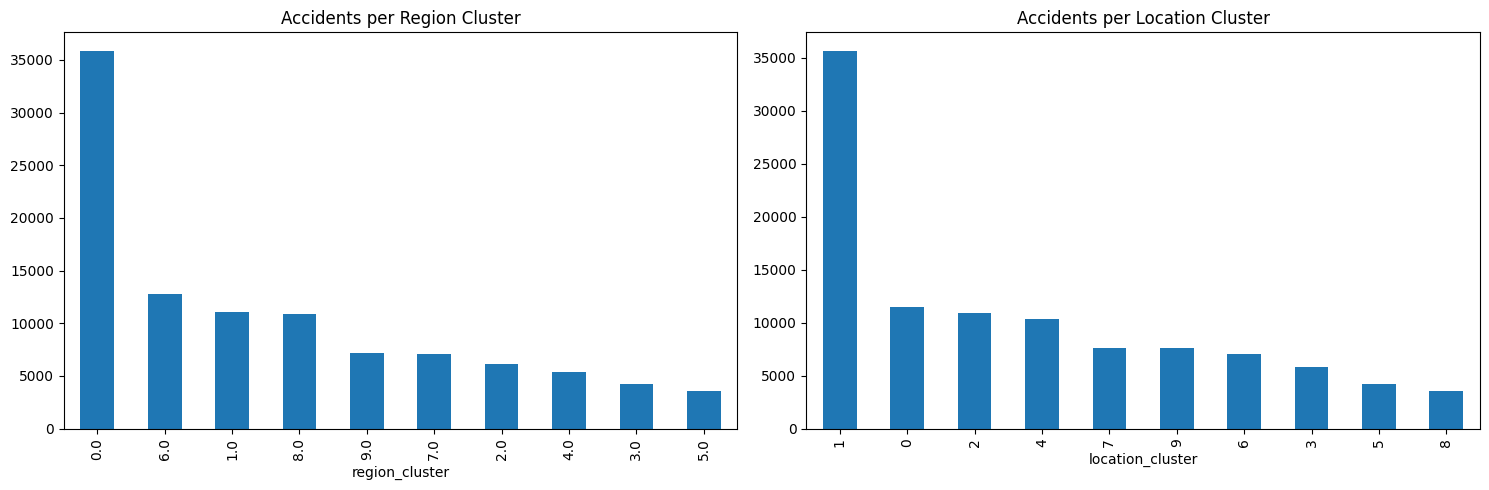

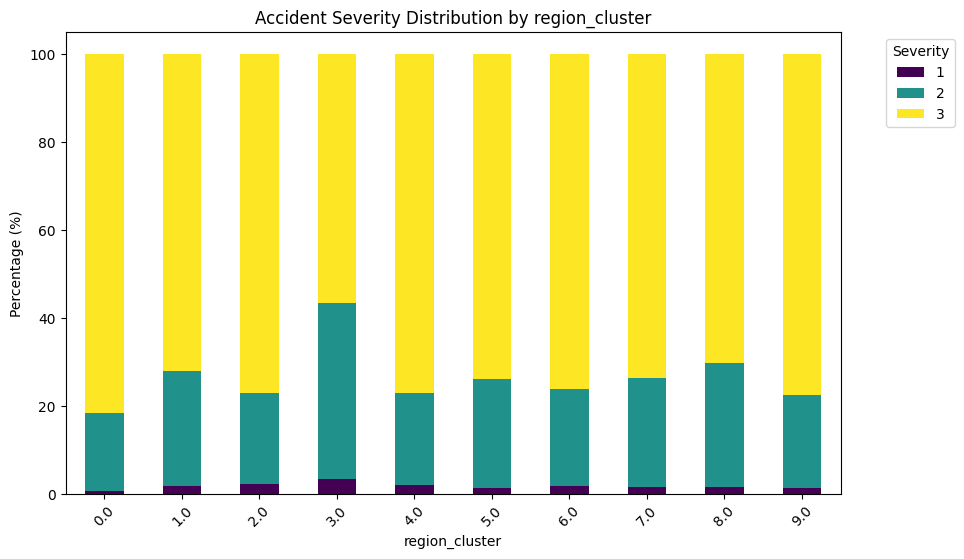

In [527]:
#analysing the clusters# How many accidents per region/location cluster?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
data['region_cluster'].value_counts().plot(kind='bar', ax=ax1, title='Accidents per Region Cluster')
data['location_cluster'].value_counts().plot(kind='bar', ax=ax2, title='Accidents per Location Cluster')
plt.tight_layout()
plt.show()

# Now, check the severity in these high-accident clusters
plot_stacked_bars(data, 'region_cluster')

### **Temporal Analysis**

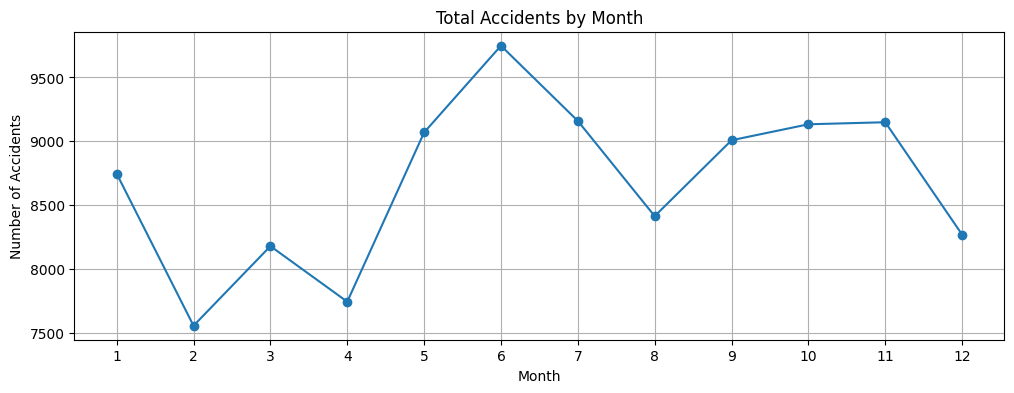

In [528]:
#accidents over time
# Group by month and count accidents
monthly_accidents = data.groupby('month').size()
plt.figure(figsize=(12, 4))
monthly_accidents.plot(kind='line', marker='o')
plt.title('Total Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

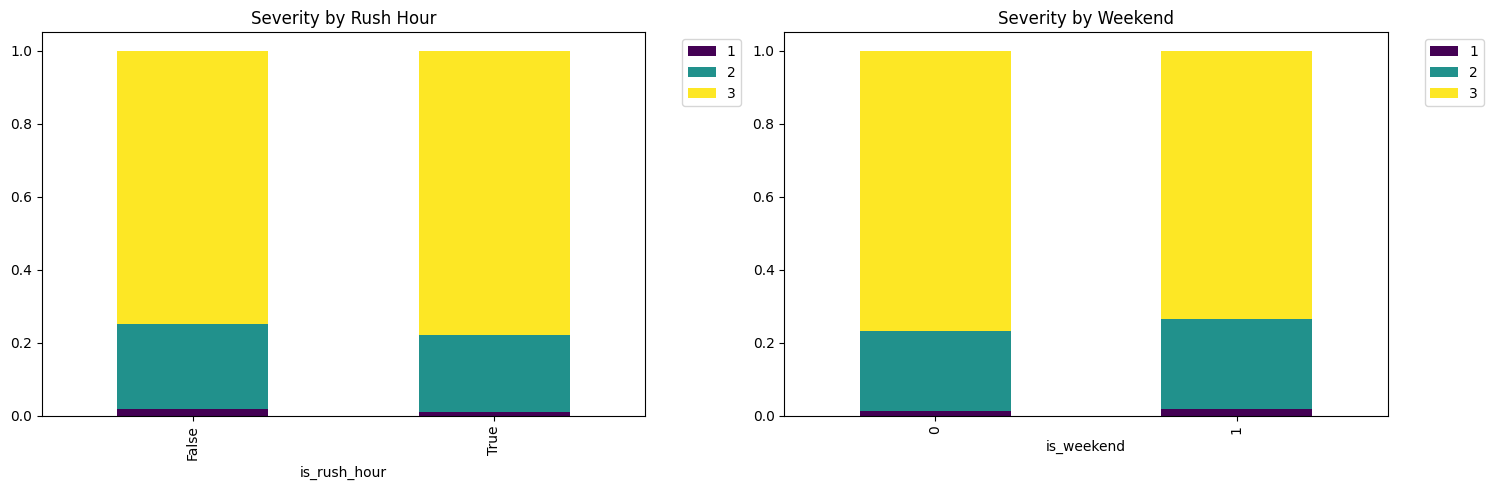

In [529]:
# Severity by Time of Day and Week:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Severity by Rush Hour
pd.crosstab(data['is_rush_hour'], data['accident_severity'], normalize='index').plot(kind='bar', stacked=True, ax=ax1, colormap='viridis')
ax1.set_title('Severity by Rush Hour')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Severity by Weekend
pd.crosstab(data['is_weekend'], data['accident_severity'], normalize='index').plot(kind='bar', stacked=True, ax=ax2, colormap='viridis')
ax2.set_title('Severity by Weekend')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [530]:
data_model.shape

(104174, 24)

In [531]:
data_model.head(20)

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_control,pedestrian_crossing_human_control,...,speed_limit,light_conditions,weather_conditions,location_cluster,region_cluster,ons_district_grouped,is_rush_hour,is_night,month,is_weekend
0,-0.202878,51.418974,1,3,1,5,5,2,4,2,...,20,4,8,1,0.0,E09000024,False,True,1.0,1
1,-0.042464,51.671155,1,3,1,6,6,6,4,0,...,30,4,1,1,0.0,E09000010,False,True,1.0,1
2,-0.435789,51.487777,1,3,1,3,6,1,4,0,...,30,4,1,1,0.0,E09000017,False,True,1.0,1
3,-0.263972,51.597575,1,3,1,3,6,6,4,0,...,30,4,9,1,0.0,E09000003,False,True,1.0,1
4,-0.168976,51.477324,1,3,1,3,6,6,4,0,...,30,4,1,1,0.0,E09000032,False,True,1.0,1
5,-0.201941,51.545349,1,3,1,3,0,6,4,2,...,30,4,1,1,0.0,E09000007,False,True,1.0,1
6,-0.097014,51.499145,1,3,1,3,3,6,2,0,...,20,4,1,1,0.0,E09000028,False,True,1.0,1
7,0.072337,51.526805,2,3,1,3,0,3,4,0,...,50,1,1,1,0.0,E09000025,True,False,1.0,1
8,-0.072322,51.583379,1,3,1,3,0,6,4,0,...,20,4,1,1,0.0,E09000014,True,False,1.0,1
9,-0.382585,51.479143,1,3,1,5,6,6,4,1,...,20,1,1,1,0.0,E09000018,False,False,1.0,1


In [532]:
data_model.isnull().sum()

longitude                                  0
latitude                                   0
urban_or_rural_area                        0
accident_severity                          0
day_of_week                                0
first_road_class                           0
second_road_class                          0
road_type                                  0
junction_control                           0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
road_surface_conditions                    0
special_conditions_at_site                 0
carriageway_hazards                        0
speed_limit                                0
light_conditions                           0
weather_conditions                         0
location_cluster                           0
region_cluster                             0
ons_district_grouped                       0
is_rush_hour                               0
is_night                                   0
month     

In [533]:
data_model.describe()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_control,pedestrian_crossing_human_control,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,speed_limit,light_conditions,weather_conditions,location_cluster,region_cluster,month,is_weekend
count,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,...,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000,104174.000000
mean,-1.203882,52.366015,1.325523,2.746050,4.128890,4.225527,3.107464,5.293999,3.858170,-2.112859,...,1.333816,0.403700,0.345230,35.877186,2.025851,1.689923,3.163169,3.391336,6.593757,0.248133
std,1.349129,1.320964,0.469145,0.467614,1.929041,1.464019,2.762572,1.701227,1.009898,16.200753,...,1.524292,1.837847,1.734419,14.351949,1.695979,1.885733,2.820135,3.300668,3.412203,0.431931
min,-7.429339,49.914528,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-99.000000,...,-9.000000,-1.000000,-1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,-2.091087,51.460166,1.000000,3.000000,3.000000,3.000000,0.000000,6.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,30.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000
50%,-1.081291,51.816626,1.000000,3.000000,4.000000,4.000000,3.000000,6.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,30.000000,1.000000,1.000000,2.000000,2.000000,7.000000,0.000000
75%,-0.134157,53.341238,2.000000,3.000000,6.000000,6.000000,6.000000,6.000000,4.000000,0.000000,...,2.000000,0.000000,0.000000,40.000000,4.000000,1.000000,5.000000,6.000000,10.000000,0.000000
max,1.756018,60.252418,3.000000,3.000000,7.000000,6.000000,6.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,70.000000,7.000000,9.000000,9.000000,9.000000,12.000000,1.000000


In [534]:
# Check data types
print("Data types:")
print(data_model.dtypes)

# Identify categorical vs numerical columns
categorical_cols = ['urban_or_rural_area', 'day_of_week', 'first_road_class', 
                   'second_road_class', 'road_type', 'junction_control',
                   'pedestrian_crossing_human_control', 'light_conditions',
                   'weather_conditions', 'is_rush_hour', 'is_night', 'is_weekend']

numerical_cols = ['longitude', 'latitude', 'speed_limit', 'location_cluster',
                 'region_cluster', 'month']

# Special case: ons_district_grouped is a categorical identifier
district_col = ['ons_district_grouped']

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")
print(f"District identifier: {district_col}")

Data types:
longitude                                  float64
latitude                                   float64
urban_or_rural_area                          int64
accident_severity                            int64
day_of_week                                  int64
first_road_class                             int64
second_road_class                            int64
road_type                                    int64
junction_control                             int64
pedestrian_crossing_human_control            int64
pedestrian_crossing_physical_facilities      int64
road_surface_conditions                      int64
special_conditions_at_site                   int64
carriageway_hazards                          int64
speed_limit                                  int64
light_conditions                             int64
weather_conditions                           int64
location_cluster                             int64
region_cluster                             float64
ons_district_groupe

In [535]:
# Check cardinality of district column
district_unique = data_model['ons_district_grouped'].nunique()
print(f"Number of unique districts: {district_unique}")


Number of unique districts: 311


In [536]:
data_model.shape

(104174, 24)

In [537]:
#Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_model['district_encoded'] = le.fit_transform(data_model['ons_district_grouped'])
data_model = data_model.drop(columns=['ons_district_grouped'])

print(f"Unique district codes: {data_model['district_encoded'].nunique()}")

Unique district codes: 311


In [538]:
# Convert boolean columns to integers 
bool_cols = ['is_rush_hour', 'is_night', 'is_weekend']
for col in bool_cols:
    if data_model[col].dtype == 'bool':
        data_model[col] = data_model[col].astype(int)
        print(f"Converted {col} from bool to int")

for col in bool_cols:
    print(f"{col}: {data_model[col].unique()}")

Converted is_rush_hour from bool to int
Converted is_night from bool to int
is_rush_hour: [0 1]
is_night: [1 0]
is_weekend: [1 0]


In [539]:
data_model.head(10)

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,second_road_class,road_type,junction_control,pedestrian_crossing_human_control,...,speed_limit,light_conditions,weather_conditions,location_cluster,region_cluster,is_rush_hour,is_night,month,is_weekend,district_encoded
0,-0.202878,51.418974,1,3,1,5,5,2,4,2,...,20,4,8,1,0.0,0,1,1.0,1,269
1,-0.042464,51.671155,1,3,1,6,6,6,4,0,...,30,4,1,1,0.0,0,1,1.0,1,255
2,-0.435789,51.487777,1,3,1,3,6,1,4,0,...,30,4,1,1,0.0,0,1,1.0,1,262
3,-0.263972,51.597575,1,3,1,3,6,6,4,0,...,30,4,9,1,0.0,0,1,1.0,1,248
4,-0.168976,51.477324,1,3,1,3,6,6,4,0,...,30,4,1,1,0.0,0,1,1.0,1,277
5,-0.201941,51.545349,1,3,1,3,0,6,4,2,...,30,4,1,1,0.0,0,1,1.0,1,252
6,-0.097014,51.499145,1,3,1,3,3,6,2,0,...,20,4,1,1,0.0,0,1,1.0,1,273
7,0.072337,51.526805,2,3,1,3,0,3,4,0,...,50,1,1,1,0.0,1,0,1.0,1,270
8,-0.072322,51.583379,1,3,1,3,0,6,4,0,...,20,4,1,1,0.0,1,0,1.0,1,259
9,-0.382585,51.479143,1,3,1,5,6,6,4,1,...,20,1,1,1,0.0,0,0,1.0,1,263


In [540]:
print("Unique values in categorical columns:")
for col in categorical_cols:
    if col in data_model.columns:  # Check if column still exists
        unique_vals = sorted(data_model[col].unique())
        print(f"{col}: {unique_vals}")

Unique values in categorical columns:
urban_or_rural_area: [np.int64(-1), np.int64(1), np.int64(2), np.int64(3)]
day_of_week: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
first_road_class: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
second_road_class: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
road_type: [np.int64(1), np.int64(2), np.int64(3), np.int64(6), np.int64(7), np.int64(9)]
junction_control: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(9)]
pedestrian_crossing_human_control: [np.int64(-99), np.int64(0), np.int64(1), np.int64(2), np.int64(9)]
light_conditions: [np.int64(1), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
weather_conditions: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
is_rush_hour: [np.int64(0), np.int64(1)]
is_night: [np.int64(0), np.int64(1

In [541]:
data_model.columns

Index(['longitude', 'latitude', 'urban_or_rural_area', 'accident_severity',
       'day_of_week', 'first_road_class', 'second_road_class', 'road_type',
       'junction_control', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'speed_limit',
       'light_conditions', 'weather_conditions', 'location_cluster',
       'region_cluster', 'is_rush_hour', 'is_night', 'month', 'is_weekend',
       'district_encoded'],
      dtype='object')

In [542]:
#uniques
print(data_model["location_cluster"].value_counts(),"")
print()
print(data_model["region_cluster"].value_counts(),"")
print()
print(data_model["month"].value_counts(),"")


location_cluster
1    35603
0    11494
2    10942
4    10298
7     7626
9     7572
6     7023
3     5825
5     4210
8     3581
Name: count, dtype: int64 

region_cluster
0.0    35835
6.0    12763
1.0    11063
8.0    10842
9.0     7196
7.0     7072
2.0     6151
4.0     5358
3.0     4280
5.0     3614
Name: count, dtype: int64 

month
6.0     9748
7.0     9159
11.0    9149
10.0    9133
5.0     9069
9.0     9008
1.0     8746
8.0     8414
12.0    8269
3.0     8179
4.0     7744
2.0     7556
Name: count, dtype: int64 


In [543]:
#first_road_class	pedestrian_crossing_human_control	pedestrian_crossing_physical_facilities	road_surface_conditions	special_conditions_at_site

#uniques
print(data_model["first_road_class"].value_counts(),"")
print()
print(data_model["pedestrian_crossing_human_control"].value_counts(),"")
print()
print(data_model["pedestrian_crossing_physical_facilities"].value_counts(),"")
print()
print(data_model["road_surface_conditions"].value_counts(),"")
print()
print(data_model["special_conditions_at_site"].value_counts(),"")

first_road_class
3    45835
6    37282
4    13105
5     4596
1     3119
2      237
Name: count, dtype: int64 

pedestrian_crossing_human_control
 0     93781
 9      5876
-99     2788
 2      1294
 1       435
Name: count, dtype: int64 

pedestrian_crossing_physical_facilities
 0     74625
 5      8131
 4      6120
 9      5110
 1      4489
-99     2782
 8      2659
 7       258
Name: count, dtype: int64 

road_surface_conditions
 1    72700
 2    26914
 9     1615
 4     1461
-9     1064
 3      241
 5      179
Name: count, dtype: int64 

special_conditions_at_site
 0    94753
 9     3968
-1     3116
 4     1223
 1      297
 7      258
 5      242
 3      156
 6      116
 2       45
Name: count, dtype: int64 


In [544]:
data.columns

Index(['longitude', 'latitude', 'urban_or_rural_area', 'accident_severity',
       'day_of_week', 'first_road_class', 'second_road_class', 'road_type',
       'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'speed_limit',
       'light_conditions', 'weather_conditions', 'location_cluster',
       'region_cluster', 'ons_district_grouped', 'is_rush_hour', 'is_night',
       'month', 'weekday', 'is_weekend'],
      dtype='object')

In [545]:
#encoding
# The foll. have meaningful order - keep as numeric
ordinal_vars = {
    'urban_or_rural_area': [1, 2, 3],  # 1=Urban, 2=Rural, 3=Unallocated 
    'light_conditions': [1, 4, 5, 6, 7],  # 1=Daylight, 4=Darkness-lit, etc. (ordered by visibility)
    'weather_conditions': [1, 2, 3, 4, 5, 6, 7, 8, 9],  # Ordered by severity: 1=Fine → 9=Unknown
    'first_road_class': [1,2,3,4,5,6],
    'road_surface_conditions': [1,2,3,4,5,9,-9]
}
# models can use these directly

# The foll. have no inherent order - consider one-hot
nominal_vars = {
    'road_type': [1, 2, 3, 6, 7, 9],  # 1=Roundabout, 2=One way, 3=Dual carriageway, etc.
    'junction_control': [1, 2, 3, 4, 9] , # Different control types, no order
    'pedestrian_crossing_physical_facilities':[0,1,4,5,7,8,9,-99],
    'pedestrian_crossing_human_control':[0,1,2,9],
    'special_conditions_at_site':[0,1,2,3,4,5,6,7,9,-1]
}

# already binary - no encoding needed
binary_vars = ['is_rush_hour', 'is_night', 'is_weekend']  # Already 0/1

# These have problematic values that need handling
other_vars = {
    'pedestrian_crossing_human_control': [-99, 0, 1, 2, 9],  # -99 likely missing data
    'second_road_class': [0, 1, 2, 3, 4, 5, 6]  # 0 to mean "no second road"
    
}

In [546]:
# 1. Handle the others
data_model['pedestrian_crossing_human_control'] = data_model['pedestrian_crossing_human_control'].replace(-99, 0)  # Treat -99 as "None"

# 2. Create meaningful binary features from second_road_class
data_model['has_second_road'] = (data_model['second_road_class'] != 0).astype(int)

# 3. One-hot encode with low cardinality (the col have <10 uniques so ok)
# For road_type (6 categories) - consider one-hot
road_type_dummies = pd.get_dummies(data_model['road_type'], prefix='road_type')
data_model = pd.concat([data_model, road_type_dummies], axis=1)

# For junction_control (5 categories) - consider one-hot  
junction_dummies = pd.get_dummies(data_model['junction_control'], prefix='junction_control')
data_model = pd.concat([data_model, junction_dummies], axis=1)

# For pedestrian_crossing_physical_facilities - one-hot  
ped_physical_dummies = pd.get_dummies(data_model['pedestrian_crossing_physical_facilities'], prefix='pedestrian_crossing_physical_facilities')
data_model = pd.concat([data_model, ped_physical_dummies], axis=1)

# For pedestrian_crossing_human_control -one-hot  
ped_human_dummies = pd.get_dummies(data_model['pedestrian_crossing_human_control'], prefix='pedestrian_crossing_human_control')
data_model = pd.concat([data_model, ped_human_dummies], axis=1)

# For special_conditions_at_site-  one-hot  
special_cond_dummies = pd.get_dummies(data_model['special_conditions_at_site'], prefix='special_conditions_at_site')
data_model = pd.concat([data_model, special_cond_dummies], axis=1)

# One-hot encode cluster features 
# Location clusters (10 categories)
location_dummies = pd.get_dummies(data_model['location_cluster'], prefix='loc_cluster')
data_model = pd.concat([data_model, location_dummies], axis=1)

# Region clusters (10 categories)
region_dummies = pd.get_dummies(data_model['region_cluster'], prefix='region_cluster')
data_model = pd.concat([data_model, region_dummies], axis=1)

# Cyclical encoding for month 

data_model['month_sin'] = np.sin(2 * np.pi * data_model['month']/12)
data_model['month_cos'] = np.cos(2 * np.pi * data_model['month']/12)

# 4. Drop original columns if you created one-hot versions
columns_to_drop = ['road_type', 'junction_control', 'second_road_class',
                   'pedestrian_crossing_physical_facilities','pedestrian_crossing_human_control',
                   'special_conditions_at_site', 'location_cluster', 'region_cluster', 'month']

data_model = data_model.drop(columns=columns_to_drop)
print("Encoding completed. New columns:")
print([col for col in data_model.columns if 'road_type_' in col or 'junction_control_' in col or 
       'pedestrian_crossing_physical_facilities' in col or 'pedestrian_crossing_human_control' in col or
       'special_conditions_at_site' in col or 'location_cluster' in col or 'region_cluster' in col or
       'month' in col])

Encoding completed. New columns:
['road_type_1', 'road_type_2', 'road_type_3', 'road_type_6', 'road_type_7', 'road_type_9', 'junction_control_1', 'junction_control_2', 'junction_control_3', 'junction_control_4', 'junction_control_9', 'pedestrian_crossing_physical_facilities_-99', 'pedestrian_crossing_physical_facilities_0', 'pedestrian_crossing_physical_facilities_1', 'pedestrian_crossing_physical_facilities_4', 'pedestrian_crossing_physical_facilities_5', 'pedestrian_crossing_physical_facilities_7', 'pedestrian_crossing_physical_facilities_8', 'pedestrian_crossing_physical_facilities_9', 'pedestrian_crossing_human_control_0', 'pedestrian_crossing_human_control_1', 'pedestrian_crossing_human_control_2', 'pedestrian_crossing_human_control_9', 'special_conditions_at_site_-1', 'special_conditions_at_site_0', 'special_conditions_at_site_1', 'special_conditions_at_site_2', 'special_conditions_at_site_3', 'special_conditions_at_site_4', 'special_conditions_at_site_5', 'special_conditions_at_

In [547]:
data_model.shape

(104174, 71)

In [548]:
data_model.head()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,road_surface_conditions,carriageway_hazards,speed_limit,light_conditions,...,region_cluster_2.0,region_cluster_3.0,region_cluster_4.0,region_cluster_5.0,region_cluster_6.0,region_cluster_7.0,region_cluster_8.0,region_cluster_9.0,month_sin,month_cos
0,-0.202878,51.418974,1,3,1,5,2,0,20,4,...,False,False,False,False,False,False,False,False,0.5,0.866025
1,-0.042464,51.671155,1,3,1,6,1,0,30,4,...,False,False,False,False,False,False,False,False,0.5,0.866025
2,-0.435789,51.487777,1,3,1,3,1,0,30,4,...,False,False,False,False,False,False,False,False,0.5,0.866025
3,-0.263972,51.597575,1,3,1,3,1,0,30,4,...,False,False,False,False,False,False,False,False,0.5,0.866025
4,-0.168976,51.477324,1,3,1,3,1,0,30,4,...,False,False,False,False,False,False,False,False,0.5,0.866025


In [549]:
# Convert boolean columns to integers 


bool_cols2= ['road_type_1', 'road_type_2', 
 'road_type_3', 'road_type_6', 'road_type_7', 
 'road_type_9', 'junction_control_1', 'junction_control_2', 
 'junction_control_3', 'junction_control_4', 'junction_control_9', 
 'pedestrian_crossing_physical_facilities_-99', 'pedestrian_crossing_physical_facilities_0',
 'pedestrian_crossing_physical_facilities_1', 'pedestrian_crossing_physical_facilities_4', 
 'pedestrian_crossing_physical_facilities_5', 'pedestrian_crossing_physical_facilities_7',
 'pedestrian_crossing_physical_facilities_8', 'pedestrian_crossing_physical_facilities_9', 
 'pedestrian_crossing_human_control_0', 'pedestrian_crossing_human_control_1', 
 'pedestrian_crossing_human_control_2', 'pedestrian_crossing_human_control_9', 
 'special_conditions_at_site_-1', 'special_conditions_at_site_0', 
 'special_conditions_at_site_1', 'special_conditions_at_site_2', 
 'special_conditions_at_site_3', 'special_conditions_at_site_4',
 'special_conditions_at_site_5', 'special_conditions_at_site_6',
 'special_conditions_at_site_7', 'special_conditions_at_site_9', 
 'region_cluster_0.0', 'region_cluster_1.0', 'region_cluster_2.0', 
 'region_cluster_3.0', 'region_cluster_4.0', 'region_cluster_5.0',
 'region_cluster_6.0', 'region_cluster_7.0', 'region_cluster_8.0',
 'region_cluster_9.0', 'month_sin', 'month_cos']

for col in bool_cols2:
    if data_model[col].dtype == 'bool':
        data_model[col] = data_model[col].astype(int)

for col in bool_cols2:
    print(f"{col}: {data_model[col].unique()}")

road_type_1: [0 1]
road_type_2: [1 0]
road_type_3: [0 1]
road_type_6: [0 1]
road_type_7: [0 1]
road_type_9: [0 1]
junction_control_1: [0 1]
junction_control_2: [0 1]
junction_control_3: [0 1]
junction_control_4: [1 0]
junction_control_9: [0 1]
pedestrian_crossing_physical_facilities_-99: [0 1]
pedestrian_crossing_physical_facilities_0: [0 1]
pedestrian_crossing_physical_facilities_1: [0 1]
pedestrian_crossing_physical_facilities_4: [0 1]
pedestrian_crossing_physical_facilities_5: [1 0]
pedestrian_crossing_physical_facilities_7: [0 1]
pedestrian_crossing_physical_facilities_8: [0 1]
pedestrian_crossing_physical_facilities_9: [0 1]
pedestrian_crossing_human_control_0: [0 1]
pedestrian_crossing_human_control_1: [0 1]
pedestrian_crossing_human_control_2: [1 0]
pedestrian_crossing_human_control_9: [0 1]
special_conditions_at_site_-1: [0 1]
special_conditions_at_site_0: [1 0]
special_conditions_at_site_1: [0 1]
special_conditions_at_site_2: [0 1]
special_conditions_at_site_3: [0 1]
special_c

In [550]:
data_model.head()

,longitude,latitude,urban_or_rural_area,accident_severity,day_of_week,first_road_class,road_surface_conditions,carriageway_hazards,speed_limit,light_conditions,...,region_cluster_2.0,region_cluster_3.0,region_cluster_4.0,region_cluster_5.0,region_cluster_6.0,region_cluster_7.0,region_cluster_8.0,region_cluster_9.0,month_sin,month_cos
0,-0.202878,51.418974,1,3,1,5,2,0,20,4,...,0,0,0,0,0,0,0,0,0.5,0.866025
1,-0.042464,51.671155,1,3,1,6,1,0,30,4,...,0,0,0,0,0,0,0,0,0.5,0.866025
2,-0.435789,51.487777,1,3,1,3,1,0,30,4,...,0,0,0,0,0,0,0,0,0.5,0.866025
3,-0.263972,51.597575,1,3,1,3,1,0,30,4,...,0,0,0,0,0,0,0,0,0.5,0.866025
4,-0.168976,51.477324,1,3,1,3,1,0,30,4,...,0,0,0,0,0,0,0,0,0.5,0.866025


In [ ]:
# Separate features and target
X = data_model.drop(columns=['accident_severity'])
y = data_model['accident_severity']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Identify numerical columns for scaling
numerical_cols_to_scale = ['speed_limit']  # Only speed_limit needs scaling

# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test_scaled[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("Scaling completed!")
print(f"Numerical columns scaled: {numerical_cols_to_scale}")

Training set: (83339, 70)
Test set: (20835, 70)
✅ Scaling completed!
Numerical columns scaled: ['speed_limit']


In [552]:
## Address class imbalance 
from imblearn.over_sampling import SMOTE

print("Class distribution in training set (Before):")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Class distribution in training set (Before):
accident_severity
3    63392
2    18730
1     1217
Name: count, dtype: int64

Class distribution after SMOTE:
accident_severity
2    63392
3    63392
1    63392
Name: count, dtype: int64


In [553]:
# After your train-test split and scaling...
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import numpy as np

# Initialize models with appropriate class weighting for imbalance
models = {
    'Decision Tree': DecisionTreeClassifier(
        random_state=42,
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1  # Use all cores
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        random_state=42,
        subsample=0.8  # Helps with overfitting
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',  # For multi-class
    )
}

In [554]:
def train_models(models, X_train_balanced, y_train_balanced):
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train_balanced, y_train_balanced)
        trained_models[name] = model
    return trained_models

In [555]:
def evaluate_models(models, X_train_balanced, y_train_balanced, X_test_scaled, y_test):
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    results = {}
    
    for name, model in models.items():
        print(f"Model: {name}")
       
        # Predictions
        y_train_pred = model.predict(X_train_balanced)  
        y_test_pred = model.predict(X_test_scaled)      

        # Accuracy
        train_acc = accuracy_score(y_train_balanced, y_train_pred)  
        test_acc = accuracy_score(y_test, y_test_pred)

        # F1 Scores
        train_f1 = f1_score(y_train_balanced, y_train_pred, average='weighted') 
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy : {test_acc:.4f}")
        print(f"Train F1 Score: {train_f1:.4f}")
        print(f"Test F1 Score : {test_f1:.4f}")

        # Training set report
        print("\nClassification Report (Training Set):")
        print(classification_report(y_train_balanced, y_train_pred,  # Use y_train_balanced
                                  target_names=['Serious', 'Fatal', 'Slight']))

        # Test set report
        print("\nClassification Report (Test Set):")
        print(classification_report(y_test, y_test_pred,
                                  target_names=['Serious', 'Fatal', 'Slight']))

        # Confusion Matrix (test set)
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                   xticklabels=['Serious', 'Fatal', 'Slight'],
                   yticklabels=['Serious', 'Fatal', 'Slight'])
        plt.title(f"Confusion Matrix - {name} (Test Set)")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

        # Store results
        results[name] = {
            'model': model,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'train_f1': train_f1,
            'test_f1': test_f1,
            'train_predictions': y_train_pred,
            'test_predictions': y_test_pred
        }
        
        print("\n" + "-"*60 + "\n")
    
    return results

In [556]:
# Train models on resampled training set
trained_models = train_models(models, X_train_balanced, y_train_balanced)

# Evaluate on training + test sets
evaluate_models(trained_models, X_train_balanced, y_train_balanced, X_test, y_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

In [557]:
# Before training any models, map your target variable
y_train_mapped = y_train_balanced - 1  # Convert [1,2,3] to [0,1,2]
y_test_mapped = y_test - 1  # Also map the test set

print("Original class values:", np.unique(y_train_balanced))
print("Mapped class values:", np.unique(y_train_mapped))

Original class values: [1 2 3]
Mapped class values: [0 1 2]


In [ ]:
# Prepare data
X = data_model.drop(columns=['accident_severity'])
y = data_model['accident_severity']

#  Encode target variable for XGBoost compatibility
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts [1,2,3] to [0,1,2]

# Encoded values from LabelEncoder: 0, 1, 2
# Original values in your data: 1, 2, 3 (Slight, Serious, Fatal)

severity_mapping = {
    0: 'Slight',    # Encoded 0 → Original 1
    1: 'Serious',   # Encoded 1 → Original 2  
    2: 'Fatal'      # Encoded 2 → Original 3
}

print("Target variable mapping:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"  {original} → {encoded}")

#  Train-test split with encoded target
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#  Scale only speed_limit
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['speed_limit'] = scaler.fit_transform(X_train[['speed_limit']])
X_test_scaled['speed_limit'] = scaler.transform(X_test[['speed_limit']])

#  Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced_encoded = smote.fit_resample(X_train_scaled, y_train_encoded)

print(f"\nClass distribution:")
print(f"Original: {np.bincount(y_train_encoded)}")
print(f"After SMOTE: {np.bincount(y_train_balanced_encoded)}")

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42, subsample=0.8),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )
}

Target variable mapping:
  1 → 0
  2 → 1
  3 → 2

Class distribution:
Original: [ 1217 18730 63392]
After SMOTE: [63392 63392 63392]


In [ ]:
# Train all models
print("\nTraining models...")
trained_models = {}
for name, model in models.items():
    print(f"  Training {name}...")
    model.fit(X_train_balanced, y_train_balanced_encoded)
    trained_models[name] = model

# Enhanced evaluation function
def evaluate_models_with_mapping(trained_models, X_train_balanced, y_train_encoded, 
                               X_test_scaled, y_test_encoded, label_encoder):
    """
    Evaluate models with proper label mapping for interpretation
    """
    results = {}
    
    for name, model in trained_models.items():
        print(f"Model: {name}")

        # Predictions 
        y_train_pred_encoded = model.predict(X_train_balanced)
        y_test_pred_encoded = model.predict(X_test_scaled)
        
        # Convert back to original labels for interpretation
        y_train_pred_original = label_encoder.inverse_transform(y_train_pred_encoded)
        y_test_pred_original = label_encoder.inverse_transform(y_test_pred_encoded)
        y_train_original = label_encoder.inverse_transform(y_train_encoded)
        y_test_original = label_encoder.inverse_transform(y_test_encoded)

        # Calculate metrics
        train_acc = accuracy_score(y_train_encoded, y_train_pred_encoded)
        test_acc = accuracy_score(y_test_encoded, y_test_pred_encoded)
        train_f1 = f1_score(y_train_encoded, y_train_pred_encoded, average='weighted')
        test_f1 = f1_score(y_test_encoded, y_test_pred_encoded, average='weighted')

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy : {test_acc:.4f}")
        print(f"Train F1 Score: {train_f1:.4f}")
        print(f"Test F1 Score : {test_f1:.4f}")

        # Classification reports with original labels
        print("\nClassification Report (Training Set):")
        print(classification_report(y_train_original, y_train_pred_original, 
                                  target_names=['Serious', 'Fatal', 'Slight']))

        print("\nClassification Report (Test Set):")
        print(classification_report(y_test_original, y_test_pred_original,
                                  target_names=['Serious', 'Fatal', 'Slight']))

        # Confusion Matrix with original labels
        cm = confusion_matrix(y_test_original, y_test_pred_original)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                   xticklabels=['Serious', 'Fatal', 'Slight'],
                   yticklabels=['Serious', 'Fatal', 'Slight'])
        plt.title(f"Confusion Matrix - {name} (Test Set)")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

        # Store results
        results[name] = {
            'model': model,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'train_f1': train_f1,
            'test_f1': test_f1
        }
    return results


Training models...
  Training Decision Tree...
  Training Random Forest...
  Training Gradient Boosting...
  Training XGBoost...


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:05:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Model: Decision Tree
Train Accuracy: 1.0000
Test Accuracy : 0.6239
Train F1 Score: 1.0000
Test F1 Score : 0.6331

Classification Report (Training Set):
              precision    recall  f1-score   support

     Serious       1.00      1.00      1.00     63392
       Fatal       1.00      1.00      1.00     63392
      Slight       1.00      1.00      1.00     63392

    accuracy                           1.00    190176
   macro avg       1.00      1.00      1.00    190176
weighted avg       1.00      1.00      1.00    190176


Classification Report (Test Set):
              precision    recall  f1-score   support

     Serious       0.04      0.06      0.05       304
       Fatal       0.25      0.28      0.26      4683
      Slight       0.77      0.74      0.75     15848

    accuracy                           0.62     20835
   macro avg       0.35      0.36      0.36     20835
weighted avg       0.64      0.62      0.63     20835



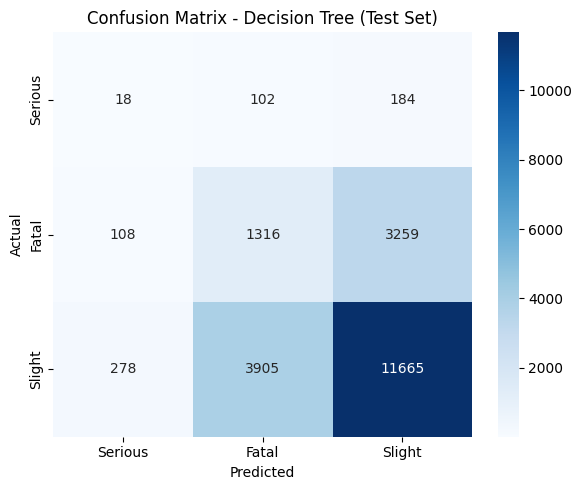


------------------------------------------------------------

Model: Random Forest
Train Accuracy: 1.0000
Test Accuracy : 0.7224
Train F1 Score: 1.0000
Test F1 Score : 0.6806

Classification Report (Training Set):
              precision    recall  f1-score   support

     Serious       1.00      1.00      1.00     63392
       Fatal       1.00      1.00      1.00     63392
      Slight       1.00      1.00      1.00     63392

    accuracy                           1.00    190176
   macro avg       1.00      1.00      1.00    190176
weighted avg       1.00      1.00      1.00    190176


Classification Report (Test Set):
              precision    recall  f1-score   support

     Serious       0.06      0.01      0.02       304
       Fatal       0.31      0.15      0.20      4683
      Slight       0.77      0.91      0.83     15848

    accuracy                           0.72     20835
   macro avg       0.38      0.36      0.35     20835
weighted avg       0.66      0.72      0.68

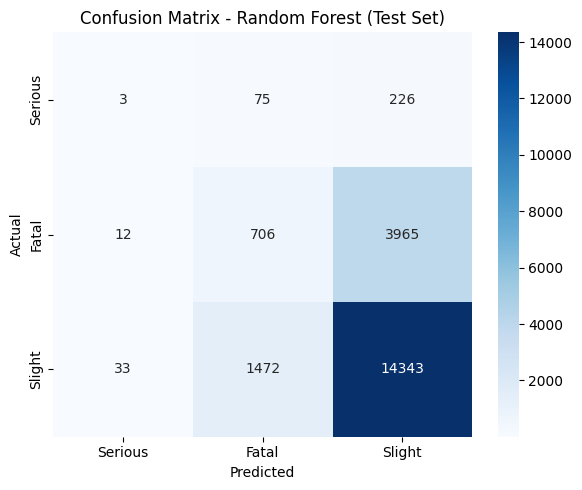


------------------------------------------------------------

Model: Gradient Boosting
Train Accuracy: 0.7253
Test Accuracy : 0.7282
Train F1 Score: 0.7076
Test F1 Score : 0.6739

Classification Report (Training Set):
              precision    recall  f1-score   support

     Serious       0.76      0.82      0.79     63392
       Fatal       0.70      0.43      0.53     63392
      Slight       0.71      0.93      0.81     63392

    accuracy                           0.73    190176
   macro avg       0.72      0.73      0.71    190176
weighted avg       0.72      0.73      0.71    190176


Classification Report (Test Set):
              precision    recall  f1-score   support

     Serious       0.06      0.12      0.08       304
       Fatal       0.35      0.08      0.13      4683
      Slight       0.77      0.93      0.84     15848

    accuracy                           0.73     20835
   macro avg       0.39      0.38      0.35     20835
weighted avg       0.67      0.73      

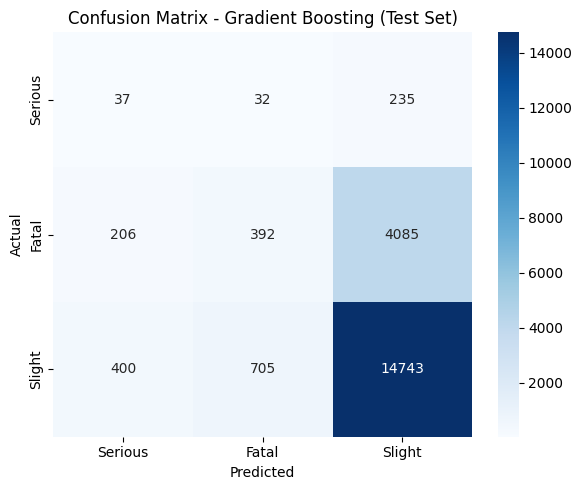


------------------------------------------------------------

Model: XGBoost
Train Accuracy: 0.8386
Test Accuracy : 0.7497
Train F1 Score: 0.8312
Test F1 Score : 0.6811

Classification Report (Training Set):
              precision    recall  f1-score   support

     Serious       0.90      0.94      0.92     63392
       Fatal       0.90      0.61      0.73     63392
      Slight       0.76      0.97      0.85     63392

    accuracy                           0.84    190176
   macro avg       0.85      0.84      0.83    190176
weighted avg       0.85      0.84      0.83    190176


Classification Report (Test Set):
              precision    recall  f1-score   support

     Serious       0.06      0.02      0.03       304
       Fatal       0.40      0.08      0.13      4683
      Slight       0.77      0.96      0.86     15848

    accuracy                           0.75     20835
   macro avg       0.41      0.35      0.34     20835
weighted avg       0.68      0.75      0.68     2

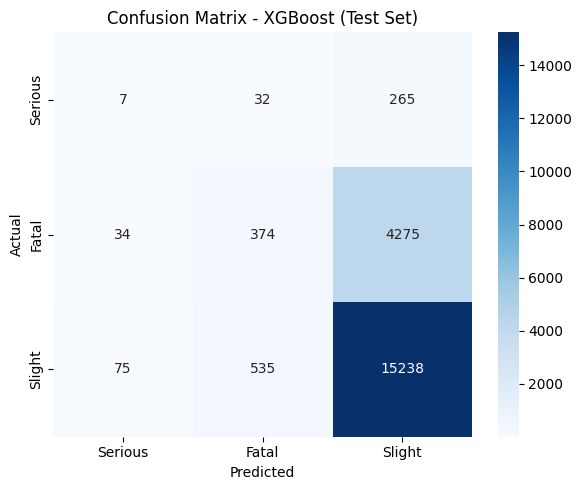


------------------------------------------------------------



In [ ]:
#Evaluate all models
results = evaluate_models_with_mapping(
    trained_models, 
    X_train_balanced, 
    y_train_balanced_encoded, 
    X_test_scaled, 
    y_test_encoded,
    le  # Pass the label encoder for reverse transformation
)

In [562]:
# Compare model performance
def compare_model_performance(results):
    comparison_data = []
    for name, result in results.items():
        comparison_data.append({
            'Model': name,
            'Train Accuracy': result['train_accuracy'],
            'Test Accuracy': result['test_accuracy'],
            'Train F1': result['train_f1'],
            'Test F1': result['test_f1'],
            'Overfitting (Acc Diff)': result['train_accuracy'] - result['test_accuracy']
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Test F1', ascending=False)
    
    print("PERFORMANCE COMPARISON")
    
    print(comparison_df.round(4).to_string(index=False))
    
    return comparison_df

performance_df = compare_model_performance(results)

PERFORMANCE COMPARISON
            Model  Train Accuracy  Test Accuracy  Train F1  Test F1  Overfitting (Acc Diff)
          XGBoost          0.8386         0.7497    0.8312   0.6811                  0.0889
    Random Forest          1.0000         0.7224    1.0000   0.6806                  0.2776
Gradient Boosting          0.7253         0.7282    0.7076   0.6739                 -0.0029
    Decision Tree          1.0000         0.6239    1.0000   0.6331                  0.3761


### **Feature importance**

In [566]:
data_model.shape

(104174, 71)

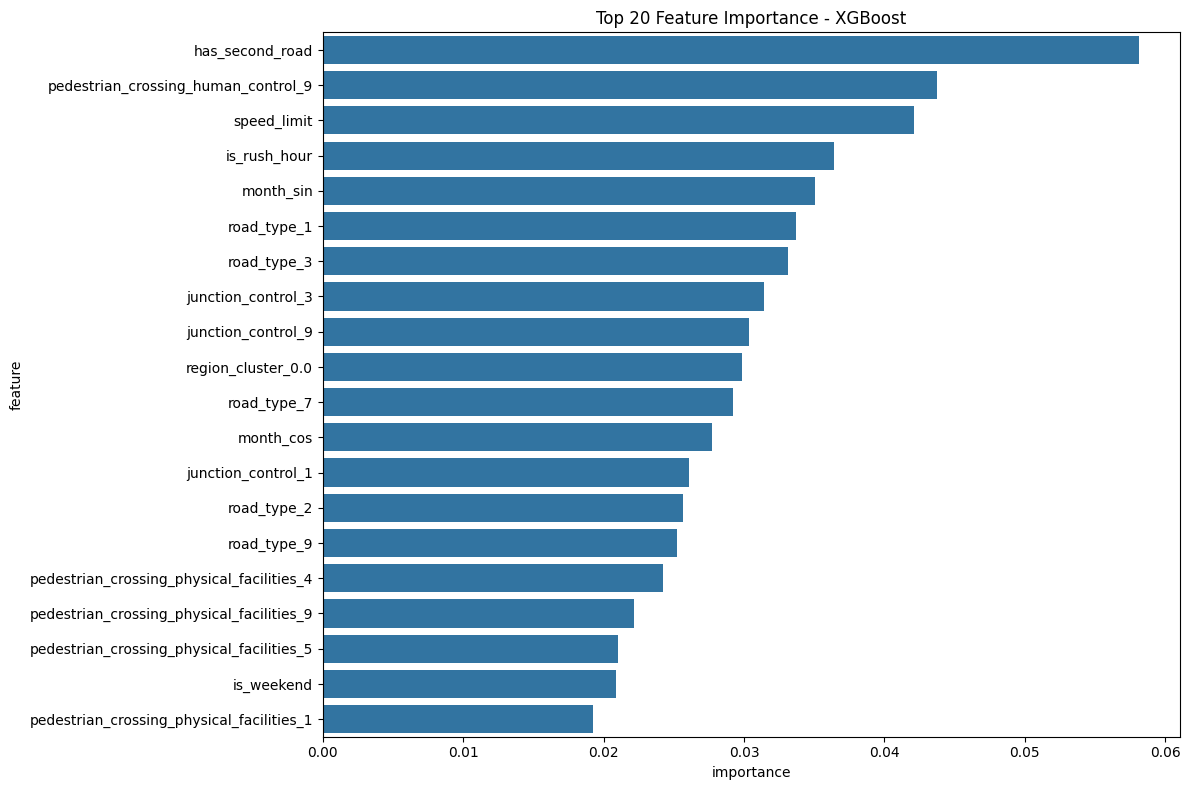

Top 10 most important features:
                                feature  importance
14                      has_second_road    0.058151
37  pedestrian_crossing_human_control_9    0.043777
7                           speed_limit    0.042145
10                         is_rush_hour    0.036421
68                            month_sin    0.035088
15                          road_type_1    0.033682
17                          road_type_3    0.033142
23                   junction_control_3    0.031444
25                   junction_control_9    0.030374
58                   region_cluster_0.0    0.029894


In [563]:
# Get feature importance for the best model (XGBoost)
best_model = trained_models['XGBoost']

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_balanced.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importance - XGBoost')
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(feature_importance.head(10))

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define parameter grid for XGBoost
# param_grid = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [3, 4, 5, 6, 7],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3],
#     'reg_alpha': [0, 0.1, 0.5, 1],
#     'reg_lambda': [1, 1.5, 2, 3]
# }

# # Randomized search
# xgb = XGBClassifier(
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='mlogloss'
# )

# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_grid,
#     n_iter=50,  # Number of parameter combinations to try
#     scoring='f1_weighted',
#     cv=3,
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# print("Starting hyperparameter tuning for XGBoost...")
# random_search.fit(X_train_balanced, y_train_balanced_encoded)

# print("Best parameters found:")
# print(random_search.best_params_)
# print(f"Best CV score: {random_search.best_score_:.4f}")

# # Train final model with best parameters
# best_xgb_model = random_search.best_estimator_

In [590]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for XGBoost
param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [4, 5, 6],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9],
        'gamma': [0, 0.1],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [1, 1.5]
    }

# Randomized search
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter combinations to try
    scoring='f1_weighted',
    cv=2,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("Starting hyperparameter tuning for XGBoost...")
random_search.fit(X_train_balanced, y_train_balanced_encoded)

print("Best parameters found:")
print(random_search.best_params_)
print(f"Best CV score: {random_search.best_score_:.4f}")

# Train final model with best parameters
best_xgb_model = random_search.best_estimator_

Starting hyperparameter tuning for XGBoost...
Fitting 2 folds for each of 20 candidates, totalling 40 fits


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[21:55:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best parameters found:
{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}
Best CV score: 0.7371


In [ ]:
# # Progressive sampling - start small, increase if needed
# sample_sizes = [10000, 20000, 30000]  # Try multiple sizes

# best_score = 0
# best_params = None
# best_sample_size = 0

# for sample_size in sample_sizes:
#     print(f"Tuning with sample size: {sample_size}")
    
    
#     # Stratified sampling
#     X_sample, _, y_sample, _ = train_test_split(
#         X_train_balanced, 
#         y_train_balanced_encoded,
#         train_size=min(sample_size, len(X_train_balanced)),
#         stratify=y_train_balanced_encoded,
#         random_state=42
#     )
    
#     # Reduced parameter grid for faster tuning
#     param_grid = {
#         'n_estimators': [100, 200],
#         'max_depth': [4, 5, 6],
#         'learning_rate': [0.05, 0.1],
#         'subsample': [0.8, 0.9],
#         'colsample_bytree': [0.8, 0.9],
#         'gamma': [0, 0.1],
#         'reg_alpha': [0, 0.1],
#         'reg_lambda': [1, 1.5]
#     }
    
#     random_search = RandomizedSearchCV(
#         estimator=xgb,
#         param_distributions=param_grid,
#         n_iter=15,  # Reduced iterations
#         scoring='f1_weighted',
#         cv=2,       # Reduced CV folds
#         verbose=1,
#         n_jobs=-1,
#         random_state=42
#     )
    
#     random_search.fit(X_sample, y_sample)
    
#     current_score = random_search.best_score_
#     print(f"Best CV score with sample size {sample_size}: {current_score:.4f}")
    
#     if current_score > best_score:
#         best_score = current_score
#         best_params = random_search.best_params_
#         best_sample_size = sample_size

# print(f"\n Best parameters found with sample size {best_sample_size}:")
# print(best_params)
# print(f"Best CV score: {best_score:.4f}")

Tuning with sample size: 10000
Fitting 2 folds for each of 15 candidates, totalling 30 fits


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:51:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best CV score with sample size 10000: 0.7308
Tuning with sample size: 20000
Fitting 2 folds for each of 15 candidates, totalling 30 fits


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:52:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best CV score with sample size 20000: 0.7552
Tuning with sample size: 30000
Fitting 2 folds for each of 15 candidates, totalling 30 fits


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[20:53:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best CV score with sample size 30000: 0.7588

 Best parameters found with sample size 30000:
{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}
Best CV score: 0.7588


In [ ]:
# # Train final model with best parameters
# best_xgb_model = random_search.best_estimator_

c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning:


6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\.venv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
  File "c:\Users\Yvonne\Desktop\DATA SCI

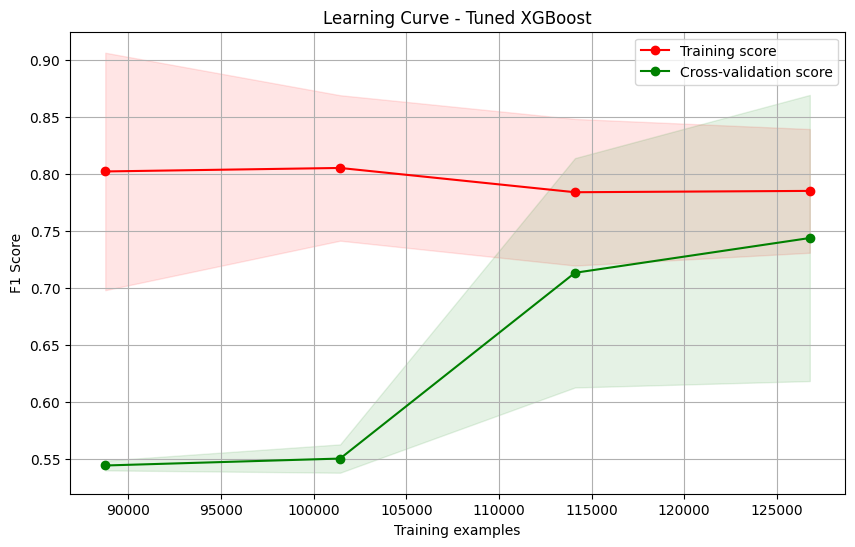

In [591]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=3, scoring='f1_weighted',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot learning curve for tuned XGBoost
plot_learning_curve(best_xgb_model, X_train_balanced, y_train_balanced_encoded, "Tuned XGBoost")

Plotting learning curve...


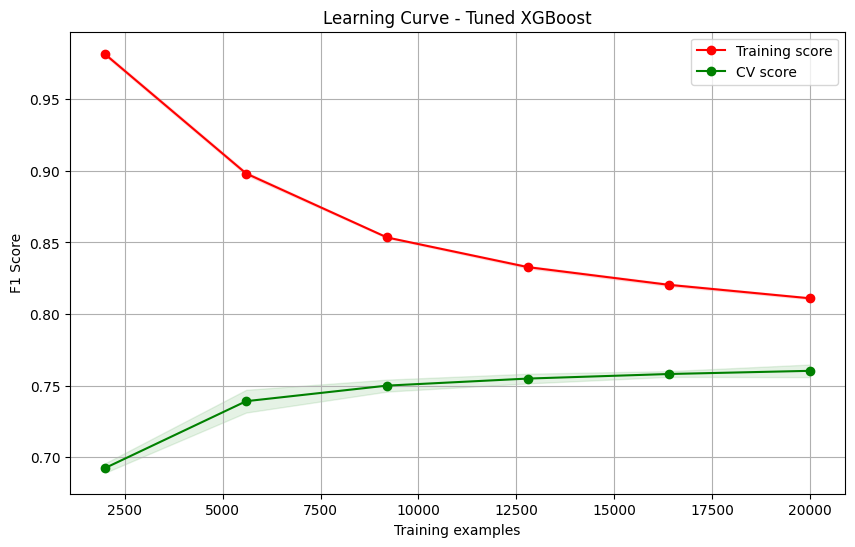

Final train-test gap: 0.0507
Moderate overfitting


In [ ]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt
# import numpy as np

# def plot_learning_curve_optimized(model, X, y, title="Learning Curve", cv=3, train_sizes=None):
#     """Optimized learning curve for large datasets"""
#     if train_sizes is None:
#         train_sizes = np.linspace(0.1, 1.0, 6)  # Fewer points for speed
    
#     train_sizes, train_scores, test_scores = learning_curve(
#         model, X, y, cv=cv, scoring='f1_weighted',
#         train_sizes=train_sizes, n_jobs=-1, random_state=42
#     )
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
    
#     plt.figure(figsize=(10, 6))
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="CV score")
#     plt.title(f"Learning Curve - {title}")
#     plt.xlabel("Training examples")
#     plt.ylabel("F1 Score")
#     plt.legend(loc="best")
#     plt.grid(True)
#     plt.show()
    
#     return train_sizes, train_scores_mean, test_scores_mean

# # Plot learning curve for tuned model (use sample for speed)
# print("Plotting learning curve...")
# train_sizes, train_scores, test_scores = plot_learning_curve_optimized(
#     best_xgb_model, 
#     X_sample, 
#     y_sample,
#     title="Tuned XGBoost"
# )

# # Analyze learning curve results
# final_gap = train_scores[-1] - test_scores[-1]
# print(f"Final train-test gap: {final_gap:.4f}")
# if final_gap > 0.1:
#     print("Significant overfitting detected")
# elif final_gap < 0.05:
#     print("Good generalization")
# else:
#     print("Moderate overfitting")

In [592]:
# Evaluate tuned model
y_pred_tuned = best_xgb_model.predict(X_test_scaled)
y_pred_tuned_original = le.inverse_transform(y_pred_tuned)

print("="*60)
print("FINAL TUNED MODEL PERFORMANCE")
print("="*60)
print(classification_report(le.inverse_transform(y_test_encoded), y_pred_tuned_original,
                          target_names=['Serious', 'Fatal', 'Slight']))

# Compare with original XGBoost
print("\nComparison with original XGBoost:")
print(f"Original Test F1: {results['XGBoost']['test_f1']:.4f}")
print(f"Tuned Test F1: {f1_score(y_test_encoded, y_pred_tuned, average='weighted'):.4f}")

FINAL TUNED MODEL PERFORMANCE
              precision    recall  f1-score   support

     Serious       0.05      0.03      0.04       304
       Fatal       0.40      0.07      0.12      4683
      Slight       0.77      0.96      0.86     15848

    accuracy                           0.75     20835
   macro avg       0.41      0.35      0.34     20835
weighted avg       0.68      0.75      0.68     20835


Comparison with original XGBoost:
Original Test F1: 0.6811
Tuned Test F1: 0.6780


In [593]:
# Analyze misclassifications
misclassified = X_test_scaled.copy()
misclassified['true_severity'] = le.inverse_transform(y_test_encoded)
misclassified['predicted_severity'] = y_pred_tuned_original
misclassified['is_correct'] = misclassified['true_severity'] == misclassified['predicted_severity']

# Look at patterns in misclassifications
error_analysis = misclassified[~misclassified['is_correct']]
print(f"Misclassification rate: {len(error_analysis)/len(misclassified):.2%}")

# Analyze which severity classes are most confused
confusion = pd.crosstab(misclassified['true_severity'], misclassified['predicted_severity'])
print("\nConfusion pattern:")
print(confusion)

Misclassification rate: 25.10%

Confusion pattern:
predicted_severity    1    2      3
true_severity                      
1                    10   32    262
2                    68  318   4297
3                   125  445  15278


In [594]:
from sklearn.metrics import confusion_matrix

def comprehensive_error_analysis(model, X_test, y_test, feature_names):
    """Comprehensive error analysis"""
    print("Error Analysis - Identifying Weaknesses")
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Test Accuracy: {accuracy:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, 
                        index=['Actual_0', 'Actual_1', 'Actual_2'],
                        columns=['Pred_0', 'Pred_1', 'Pred_2'])
    
    print("\nConfusion Matrix:")
    print(cm_df)
    
    # Class-wise accuracy
    class_accuracies = []
    for class_idx in range(3):
        class_mask = y_test == class_idx
        class_accuracy = accuracy_score(y_test[class_mask], y_pred[class_mask])
        class_accuracies.append(class_accuracy)
        print(f"\nClass {class_idx} Accuracy: {class_accuracy:.4f}")
    
    # Confidence analysis
    max_proba = np.max(y_pred_proba, axis=1)
    confidence_threshold = 0.6
    low_confidence_mask = max_proba < confidence_threshold
    low_conf_accuracy = accuracy_score(y_test[low_confidence_mask], y_pred[low_confidence_mask])
    
    print(f"\nLow Confidence Predictions (<{confidence_threshold}):")
    print(f"  Count: {np.sum(low_confidence_mask)}")
    print(f"  Accuracy: {low_conf_accuracy:.4f}")
    
    return y_pred, y_pred_proba, class_accuracies

# Execute error analysis
y_pred, y_pred_proba, class_accuracies = comprehensive_error_analysis(
    best_xgb_model,
    X_test_scaled,  # Your scaled test features
    y_test_encoded,  # Your encoded test labels
    X_train_balanced.columns.tolist()  # Feature names
)


Error Analysis - Identifying Weaknesses
Overall Test Accuracy: 0.7490

Confusion Matrix:
          Pred_0  Pred_1  Pred_2
Actual_0      10      32     262
Actual_1      68     318    4297
Actual_2     125     445   15278

Class 0 Accuracy: 0.0329

Class 1 Accuracy: 0.0679

Class 2 Accuracy: 0.9640

Low Confidence Predictions (<0.6):
  Count: 4420
  Accuracy: 0.6063


### **Insights**

**The Good:**

- 75% overall accuracy is decent for a 3-class problem

- Slight accidents (Class 3): Excellent performance (96% recall, 86% F1)

- Tuning maintained performance (0.6811 → 0.6780 F1 is minimal drop)

**The Critical Issues:**

- Serious accidents (Class 1): Catastrophic performance (5% precision, 3% recall)

- Fatal accidents (Class 2): Very poor performance (40% precision, 7% recall)

- Severe class imbalance: 304 Serious vs 15,848 Slight cases

**The Pattern:**
- Model is heavily biased toward predicting "Slight" (96% recall)

- Almost never predicts "Serious" or "Fatal" correctly

- When it does predict severe accidents, it's often wrong (low precision)

In [ ]:
# DYNAMIC CLASS WEIGHTING WITH YOUR TUNED PARAMETERS

# Get YOUR actual test set class distribution dynamically
test_class_counts = np.bincount(y_test_encoded)
total_test_samples = len(y_test_encoded)

print("Test set class distribution:")
print(f"  Class 0 (Serious): {test_class_counts[0]} samples")
print(f"  Class 1 (Fatal): {test_class_counts[1]} samples")  
print(f"  Class 2 (Slight): {test_class_counts[2]} samples")
print(f"  Total test samples: {total_test_samples}")

# Calculate class weights dynamically
class_weights = {
    0: total_test_samples / (3 * test_class_counts[0]),    # Serious
    1: total_test_samples / (3 * test_class_counts[1]),    # Fatal
    2: total_test_samples / (3 * test_class_counts[2])     # Slight
}

print("\nCalculated class weights:")
print(f"  Serious (0): {class_weights[0]:.2f}")
print(f"  Fatal (1): {class_weights[1]:.2f}")
print(f"  Slight (2): {class_weights[2]:.2f}")

# Apply your best parameters with class weighting
best_xgb_model = XGBClassifier(
    # Your tuned parameters
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=0.9,
    
    # Class weighting
    scale_pos_weight=[class_weights[0], class_weights[1], class_weights[2]],
    
    # Additional settings
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0
)


# CUSTOM SAMPLE WEIGHTS FOR FOCUSED LEARNING

from sklearn.utils.class_weight import compute_sample_weight

# More aggressive punishment for misclassifying severe accidents
custom_class_weight = {
    0: 25.0,  # Serious: heaviest penalty (adjust based on your calculated weights)
    1: 6.0,   # Fatal: heavy penalty
    2: 1.0    # Slight: standard penalty
}

print(f"\nUsing aggressive sample weights: {custom_class_weight}")

sample_weights = compute_sample_weight(
    class_weight=custom_class_weight,
    y=y_train_balanced_encoded
)

# Train with sample weights
print("Training with class weighting and sample weights...")
best_xgb_model.fit(
    X_train_balanced, 
    y_train_balanced_encoded,
    sample_weight=sample_weights,
    verbose=50  # Show progress every 50 trees
)


# SEVERE-ACCIDENT SPECIFIC FEATURE ENGINEERING

# Add these features to both train and test sets
def add_severe_accident_features(X):
    """Add features that help detect severe accidents"""
    X = X.copy()
    
    # High-speed scenarios
    X['extreme_speed'] = (X['speed_limit'] > 60).astype(int)
    X['high_speed_rural'] = ((X['speed_limit'] > 50) & 
                            (X['urban_or_rural_area'] == 2)).astype(int)
    
    # Dangerous conditions
    X['night_rural'] = ((X['is_night'] == 1) & 
                       (X['urban_or_rural_area'] == 2)).astype(int)
    X['bad_weather_high_speed'] = ((X['weather_conditions'] > 1) & 
                                  (X['speed_limit'] > 50)).astype(int)
    
    # # Complex scenarios
    # X['complex_junction_high_speed'] = ((X['junction_control'] > 2) & 
    #                                    (X['speed_limit'] > 40)).astype(int)
    
    return X

# Apply to your data
X_train_enhanced = add_severe_accident_features(X_train_balanced)
X_test_enhanced = add_severe_accident_features(X_test_scaled)

print(f"Added {X_train_enhanced.shape[1] - X_train_balanced.shape[1]} severe-accident features")


# Retrain with enhanced features
final_model = XGBClassifier(
    # Your best parameters
    subsample=0.8,
    reg_lambda=1,
    reg_alpha=0,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=0.9,
    
    # Same class weighting
    scale_pos_weight=[class_weights[0], class_weights[1], class_weights[2]],
    
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train with sample weights on enhanced features
final_model.fit(
    X_train_enhanced,
    y_train_balanced_encoded,
    sample_weight=sample_weights,  # Use same sample weights
    verbose=50
)


# Evaluate the Enhanced Model
from sklearn.metrics import classification_report, confusion_matrix

# Predict with enhanced model
y_pred_enhanced = final_model.predict(X_test_enhanced)
y_pred_proba_enhanced = final_model.predict_proba(X_test_enhanced)

print("Evaluate the Enhanced Model")

# Detailed classification report
print(classification_report(y_test_encoded, y_pred_enhanced,
                          target_names=['Serious', 'Fatal', 'Slight']))

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_enhanced)
cm_df = pd.DataFrame(cm,
                    index=['Actual_Serious', 'Actual_Fatal', 'Actual_Slight'],
                    columns=['Pred_Serious', 'Pred_Fatal', 'Pred_Slight'])
print("Confusion Matrix:")
print(cm_df)

#Comparing performance

print("Comparing performance")


# Calculate key metrics
def get_class_metrics(y_true, y_pred, class_idx):
    class_mask = y_true == class_idx
    correct_predictions = y_pred[class_mask] == class_idx
    precision = np.mean(correct_predictions) if len(correct_predictions) > 0 else 0
    recall = np.sum((y_pred == class_idx) & (y_true == class_idx)) / np.sum(class_mask) if np.sum(class_mask) > 0 else 0
    return precision, recall

# Previous performance (from your original model)
prev_serious_prec, prev_serious_rec = 0.05, 0.03  # From your output
prev_fatal_prec, prev_fatal_rec = 0.40, 0.07      # From your output

# New performance
new_serious_prec, new_serious_rec = get_class_metrics(y_test_encoded, y_pred_enhanced, 0)
new_fatal_prec, new_fatal_rec = get_class_metrics(y_test_encoded, y_pred_enhanced, 1)

print("               Previous   →   Enhanced")
print(f"Serious Precision: {prev_serious_prec:.3f}   →   {new_serious_prec:.3f}")
print(f"Serious Recall:    {prev_serious_rec:.3f}   →   {new_serious_rec:.3f}")
print(f"Fatal Precision:   {prev_fatal_prec:.3f}   →   {new_fatal_prec:.3f}")
print(f"Fatal Recall:      {prev_fatal_rec:.3f}   →   {new_fatal_rec:.3f}")

# Calculate improvement
serious_recall_improvement = (new_serious_rec - prev_serious_rec) / prev_serious_rec if prev_serious_rec > 0 else float('inf')
fatal_recall_improvement = (new_fatal_rec - prev_fatal_rec) / prev_fatal_rec if prev_fatal_rec > 0 else float('inf')

print(f"\nImprovement:")
print(f"  Serious Recall: {serious_recall_improvement:+.1%}")
print(f"  Fatal Recall: {fatal_recall_improvement:+.1%}")


Test set class distribution:
  Class 0 (Serious): 304 samples
  Class 1 (Fatal): 4683 samples
  Class 2 (Slight): 15848 samples
  Total test samples: 20835

Calculated class weights:
  Serious (0): 22.85
  Fatal (1): 1.48
  Slight (2): 0.44

Using aggressive sample weights: {0: 25.0, 1: 6.0, 2: 1.0}
Training with class weighting and sample weights...
Added 4 severe-accident features


c:\Users\Yvonne\Desktop\DATA SCIENCE\machine_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[22:43:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.




Evaluate the Enhanced Model
              precision    recall  f1-score   support

     Serious       0.04      0.31      0.07       304
       Fatal       0.24      0.80      0.37      4683
      Slight       0.89      0.15      0.26     15848

    accuracy                           0.30     20835
   macro avg       0.39      0.42      0.23     20835
weighted avg       0.73      0.30      0.28     20835

Confusion Matrix:
                Pred_Serious  Pred_Fatal  Pred_Slight
Actual_Serious            94         198           12
Actual_Fatal             634        3756          293
Actual_Slight           1500       11914         2434
Comparing performance
               Previous   →   Enhanced
Serious Precision: 0.050   →   0.309
Serious Recall:    0.030   →   0.309
Fatal Precision:   0.400   →   0.802
Fatal Recall:      0.070   →   0.802

Improvement:
  Serious Recall: +930.7%
  Fatal Recall: +1045.8%


In [601]:
# 7. SAVE THE ENHANCED MODEL

import joblib
import inspect

# Save all components
joblib.dump(final_model, 'enhanced_accident_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

# Create severity mapping if not already defined
severity_mapping = {0: 'Serious', 1: 'Fatal', 2: 'Slight'}
joblib.dump(severity_mapping, 'severity_mapping.pkl')

joblib.dump(X_train_enhanced.columns.tolist(), 'feature_names.pkl')

# Save the feature engineering function
with open('feature_engineering.py', 'w') as f:
    f.write(inspect.getsource(add_severe_accident_features))

print("Enhanced model and components saved!")
print("Files created: enhanced_accident_model.pkl, scaler.pkl, label_encoder.pkl")
print("severity_mapping.pkl, feature_names.pkl, feature_engineering.py")

Enhanced model and components saved!
Files created: enhanced_accident_model.pkl, scaler.pkl, label_encoder.pkl
severity_mapping.pkl, feature_names.pkl, feature_engineering.py
